<a href="https://colab.research.google.com/github/draglar/Unreal/blob/main/Copy_of_Real_Estate_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

> Should a potential investor invest in 3 bedrooms or 4 bedrooms?

# Dataset

# Import liberies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()


id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
df.tail()

id             date  ...  sqft_living15  sqft_lot15
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print(f'{rows} rows \n {columns} columns')

21613 rows 
 21 columns


# Data Cleaning

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
df['bathrooms'] = df.bathrooms.astype(int)

In [ ]:
df['bathrooms'].value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [ ]:
df['floors'] = df.floors.astype(int)

In [ ]:
df.head()

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3  2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4  1954400510 2015-02-18  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
df.to_csv('unreal.csv')

# E.D.A

# Univariate

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

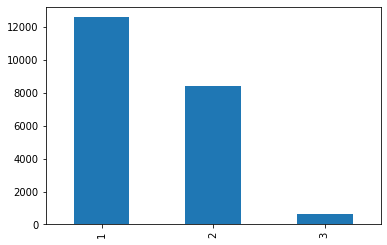

In [ ]:
df['floors'].value_counts().plot(kind='bar')

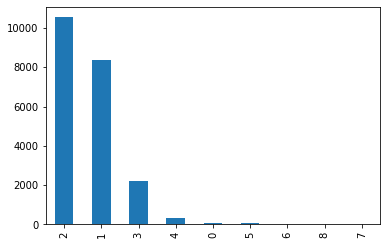

In [ ]:
df['bathrooms'].value_counts().plot(kind='bar')

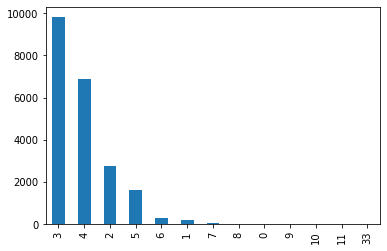

In [ ]:
df['bedrooms'].value_counts().plot(kind='bar')

In [ ]:
df['price'].mean()

540088.1417665294

In [ ]:
df['bedrooms'].mode()[0]

3

In [ ]:
df['bathrooms'].mode()[0]

2

In [ ]:
df.head()

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062
3  2487200875 2014-12-09  604000.0  ... -122.393           1360        5000
4  1954400510 2015-02-18  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

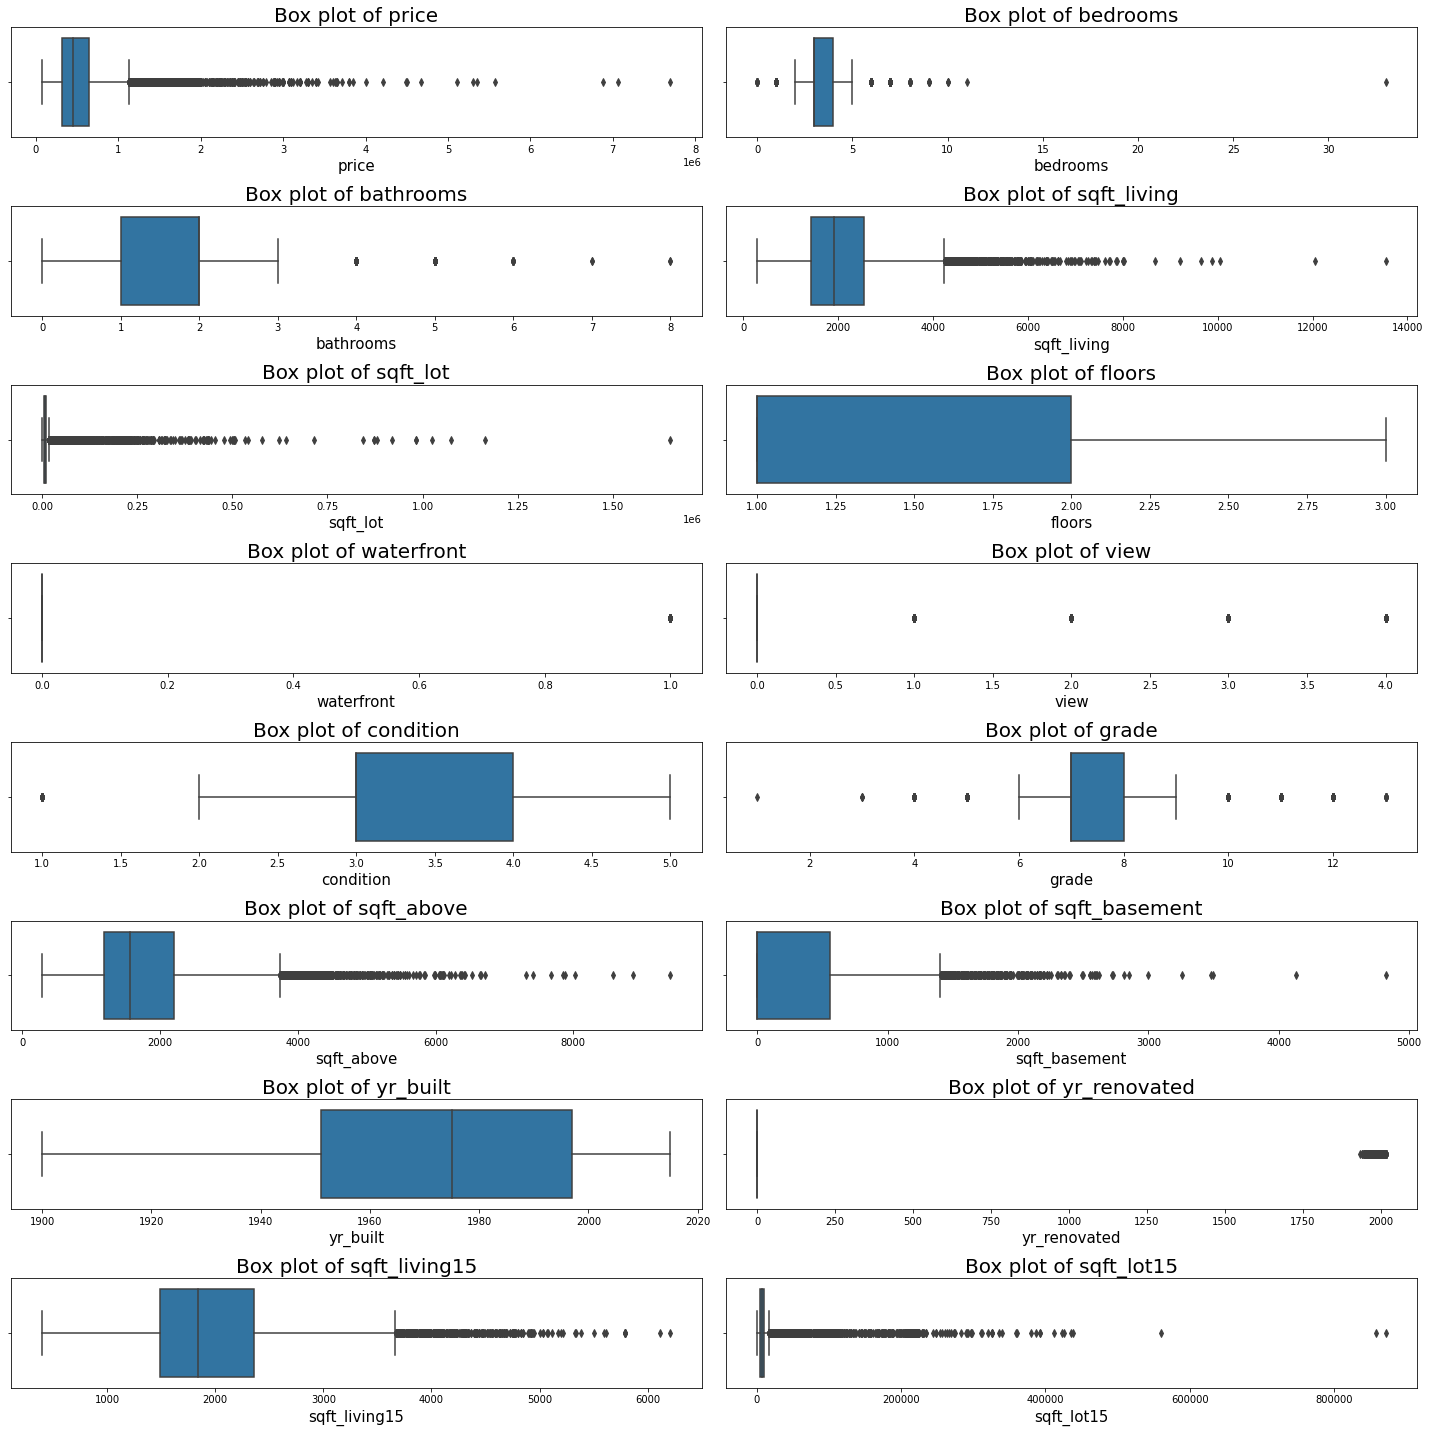

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1)

names = list(df_1.columns)
fig, axes = plt.subplots(8,2, figsize=(20,20) )  

y = 0
for name in names:
  i, j = divmod(y, 2)
  sns.boxplot(x=df[name], ax=axes[i, j])
  axes[i, j].set_title(f'Box plot of {name}', fontsize=20)
  axes[i, j].set_xlabel(name, fontsize=15)
  y+=1

plt.tight_layout()
plt.show()

# Bivariate

In [2]:
df=pd.read_csv('unreal.csv')
df.head(2)

Unnamed: 0          id        date  ...  sqft_living15  sqft_lot15  floor
0           0  7129300520  2014-10-13  ...           1340        5650      1
1           1  6414100192  2014-12-09  ...           1690        7639      2

[2 rows x 23 columns]

#####skjflkjd

In [ ]:
def outs(x):
  global col
  a=col.copy()
  p1,p3=np.percentile(a[x],[25,75])
  iqr=p3-p1
  l_bound=p1-(1.5*iqr)
  u_bound=p3+(1.5*iqr)
  a=a[~((a[x]<l_bound)|(a[x]>u_bound))]

In [ ]:
cols=list(df.columns)
for name in cols:
  print(df[cols].dtypes[0])

In [ ]:
col=df.iloc[:,2:]
for name in list(col.columns):
  outs(col[name])

KeyError: ignored

In [ ]:
a=autolib.copy()

a.shape

####biv

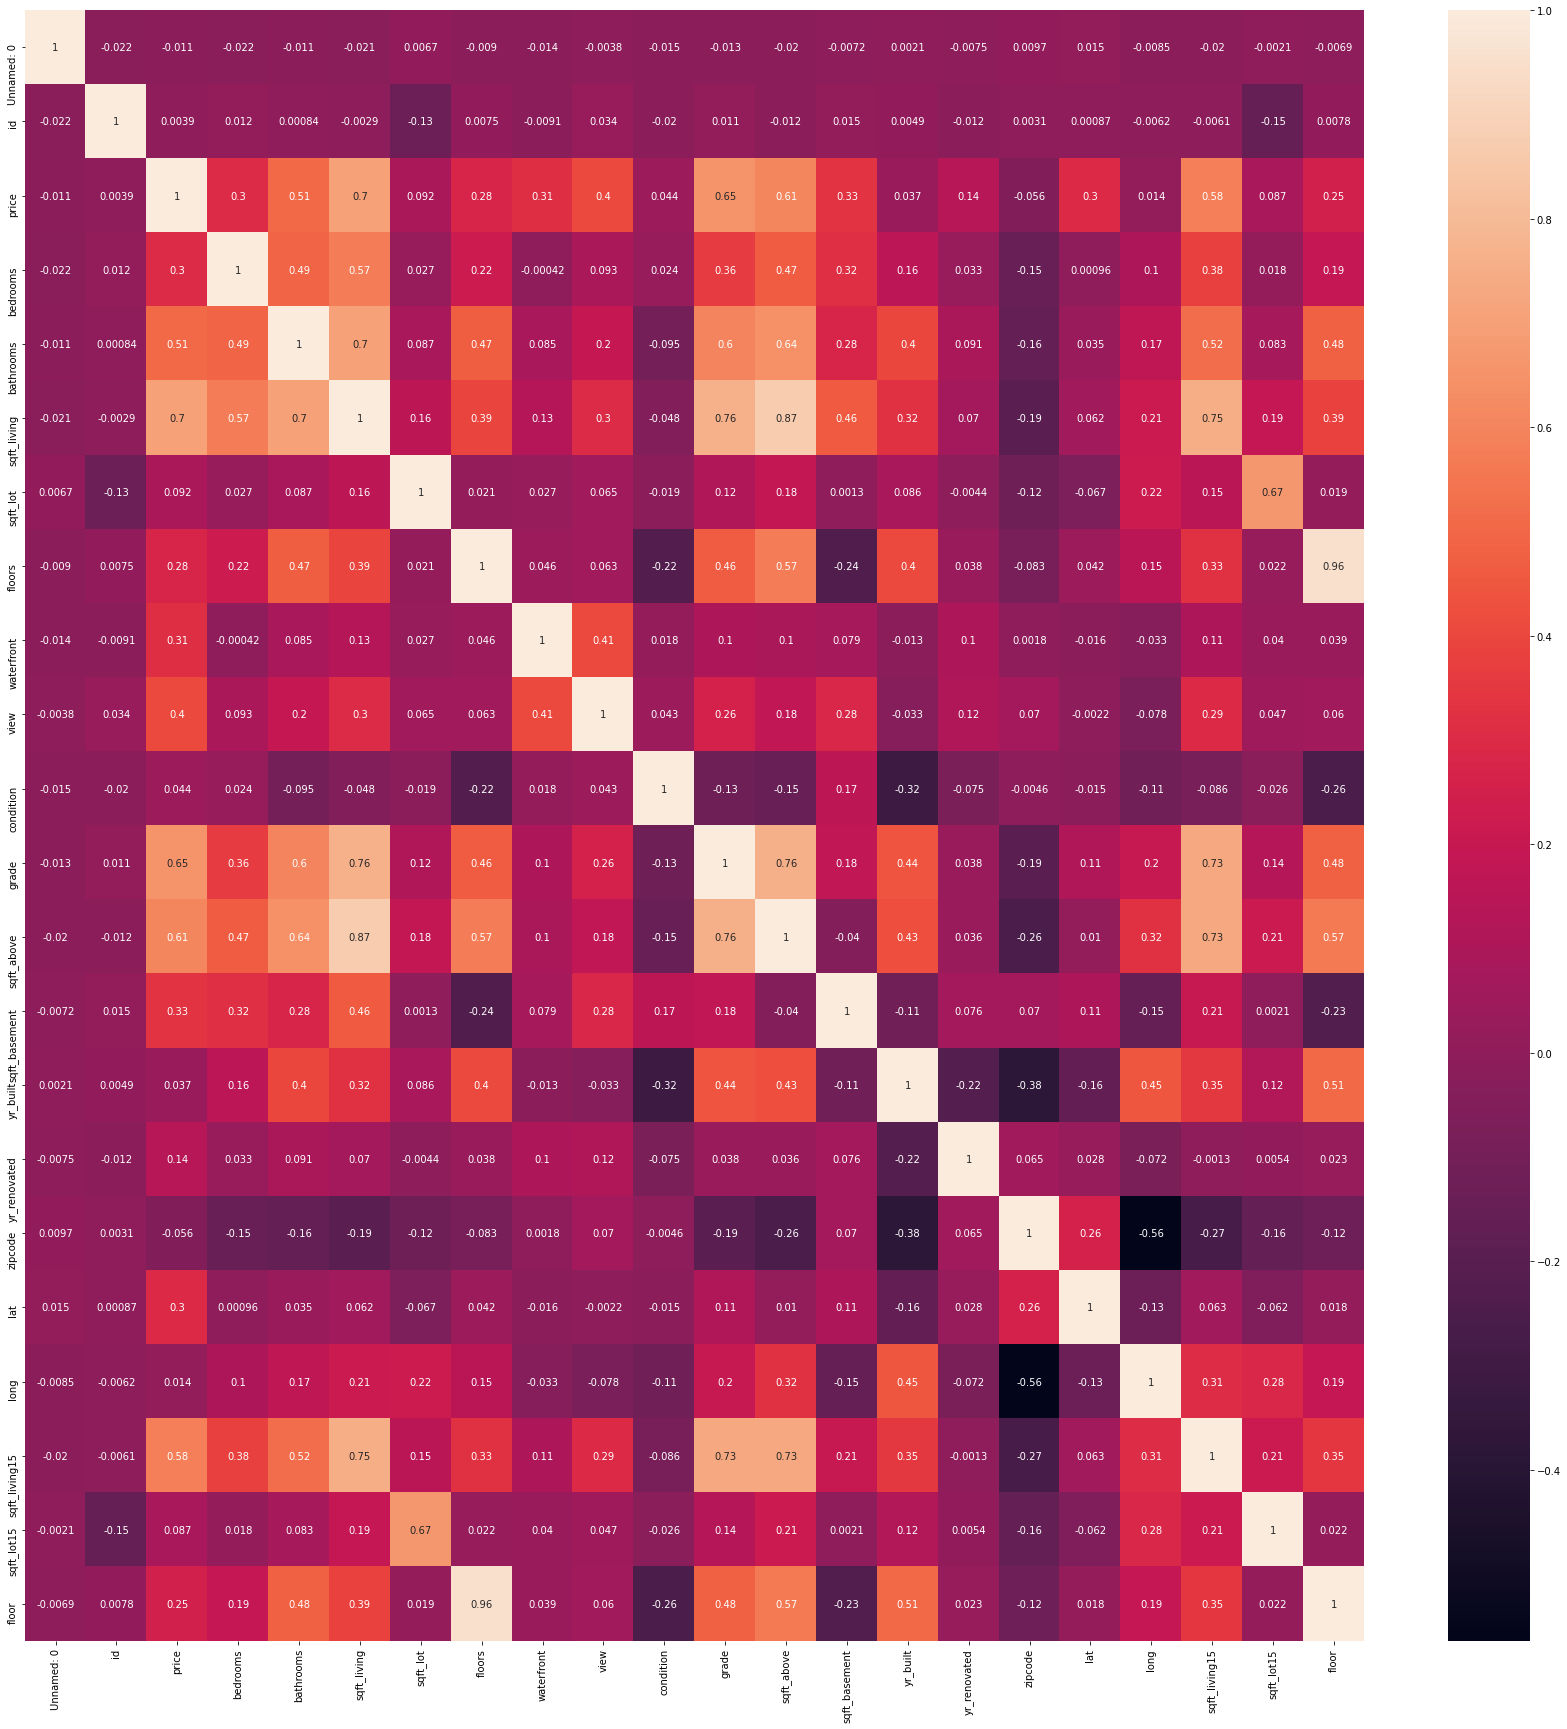

In [22]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [100]:
def plots(grouper,others):
  house=df[grouper+others]
  h_pivot=pd.pivot_table(house,index=grouper,values=others,aggfunc='mean')
  if len(others)==1:
    t=f'distribution of {others[0]} against {grouper[0]}'
    chk=False
  elif len(others)>=2:
    t=f'distribution of {others[0]} and {others[1]} against {grouper[0]}'
    chk=True
  h_pivot.plot(kind='bar',title=t,rot=0)

to run the plot its simple just type this

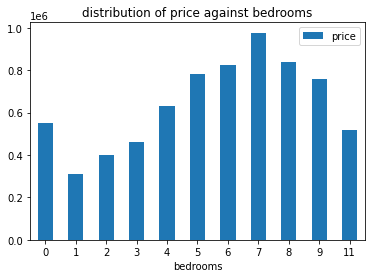

In [94]:
plots(['bedrooms'],['price'])

for grouped

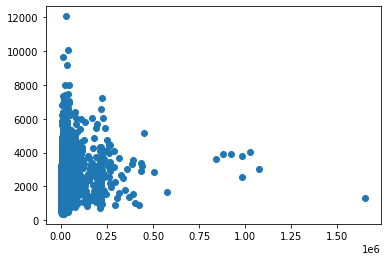

In [105]:
plt.scatter(df['sqft_lot'],df['sqft_living'])

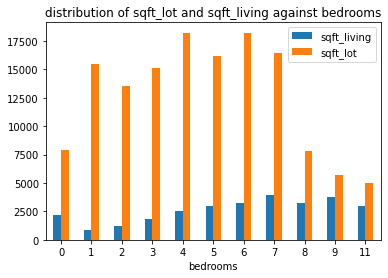

In [98]:
plots(['bedrooms'],['sqft_lot','sqft_living'])

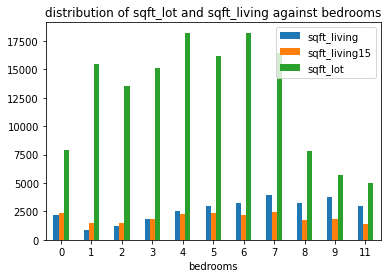

In [102]:
plots(['bedrooms'],['sqft_lot','sqft_living','sqft_living15'])

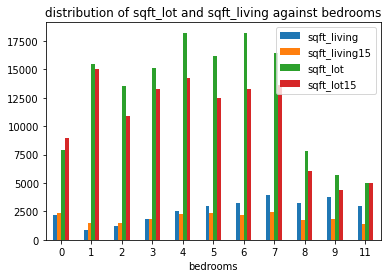

In [101]:
plots(['bedrooms'],['sqft_lot','sqft_living','sqft_living15','sqft_lot15'])

etc ...
you can pile it up as much as you can

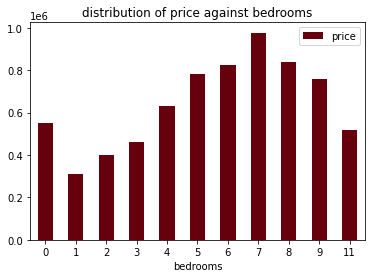

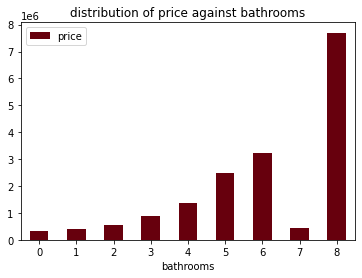

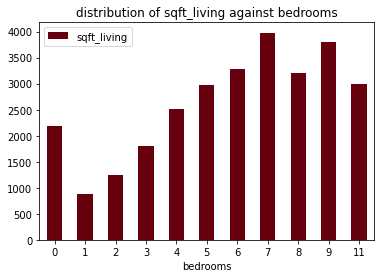

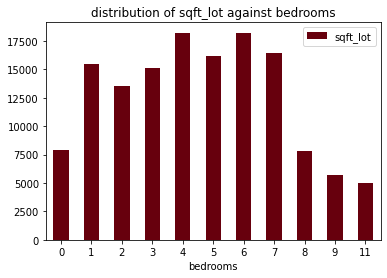

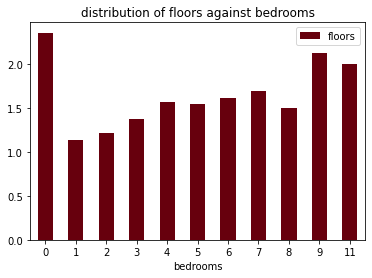

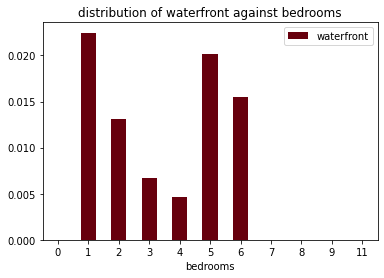

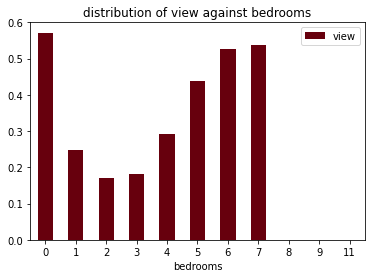

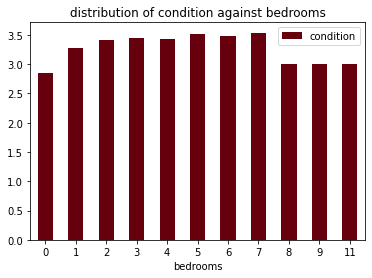

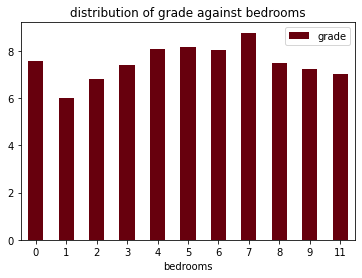

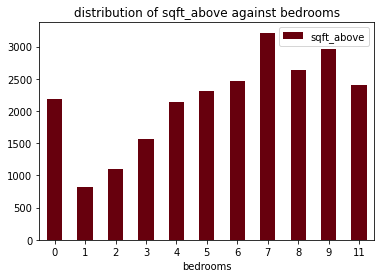

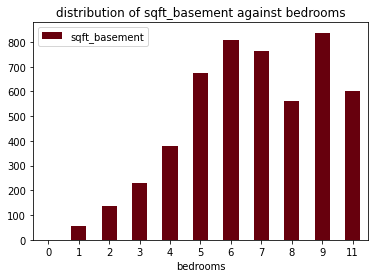

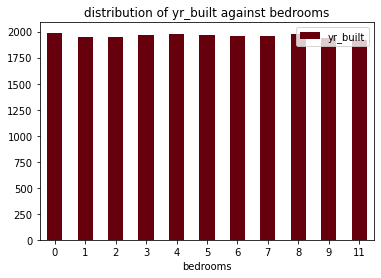

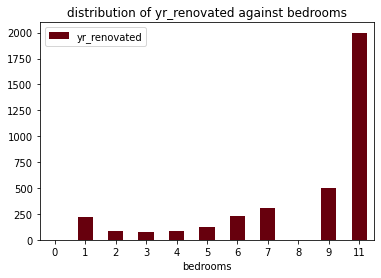

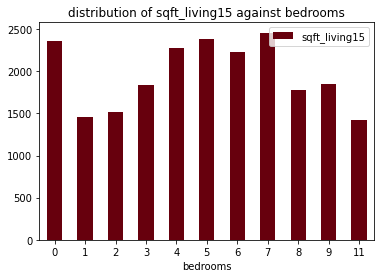

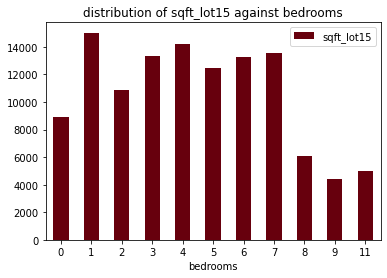

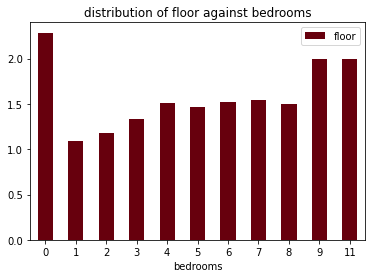

In [40]:
plots(['bedrooms'],['price'])
plots(['bathrooms'],['price'])
plots(['bedrooms'],['sqft_living'])
plots(['bedrooms'],['sqft_lot'])
plots(['bedrooms'],['floors'])
plots(['bedrooms'],['waterfront'])
plots(['bedrooms'],['view'])
plots(['bedrooms'],['condition'])
plots(['bedrooms'],['grade'])
plots(['bedrooms'],['sqft_above'])
plots(['bedrooms'],['sqft_basement'])
plots(['bedrooms'],['yr_built'])
plots(['bedrooms'],['yr_renovated'])
plots(['bedrooms'],['sqft_living15'])
plots(['bedrooms'],['sqft_lot15'])
plots(['bedrooms'],['floor'])

In [ ]:
plots(['bedrooms'],['price'])
groupers=['bedrooms','bathrooms']
for i in groupers
plots(['bedrooms'],['sqft_living'])
plots(['bedrooms'],['sqft_lot'])
plots(['bedrooms'],['floors'])
plots(['bedrooms'],['waterfront'])
plots(['bedrooms'],['view'])
plots(['bedrooms'],['condition'])
plots(['bedrooms'],['grade'])
plots(['bedrooms'],['sqft_above'])
plots(['bedrooms'],['sqft_basement'])
plots(['bedrooms'],['yr_built'])
plots(['bedrooms'],['yr_renovated'])
plots(['bedrooms'],['sqft_living15'])
plots(['bedrooms'],['sqft_lot15'])
plots(['bedrooms'],['floor'])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

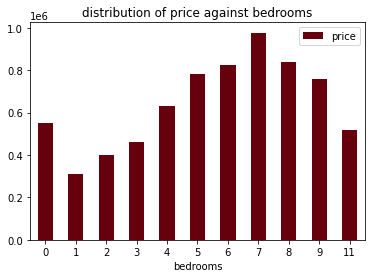

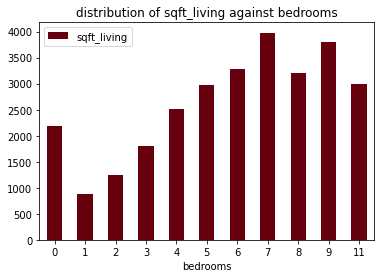

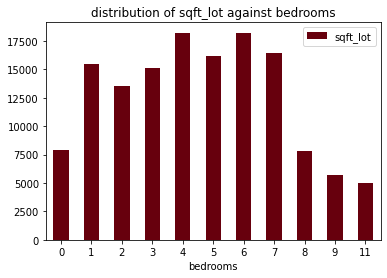

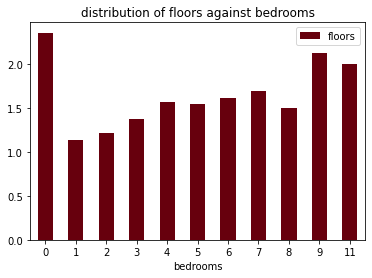

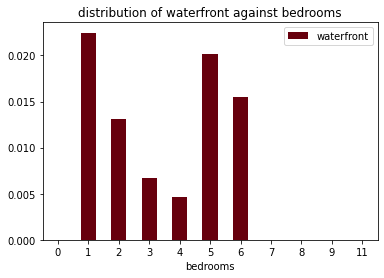

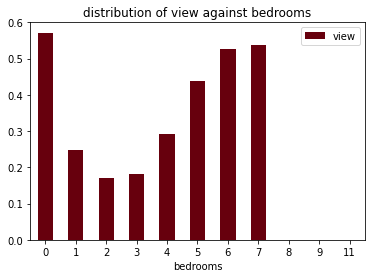

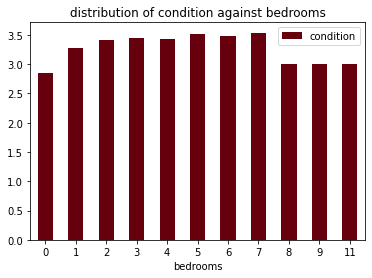

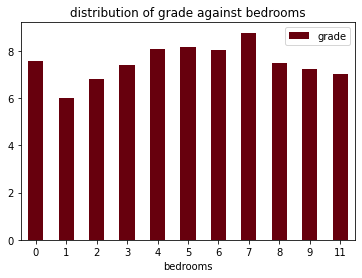

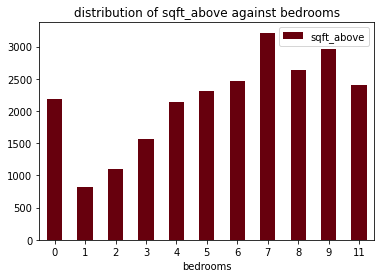

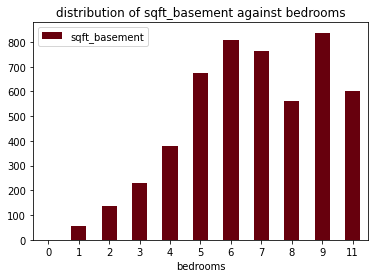

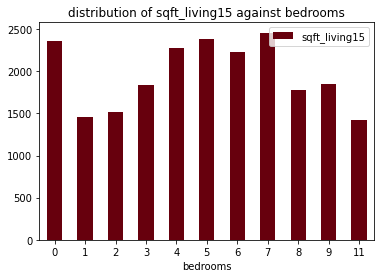

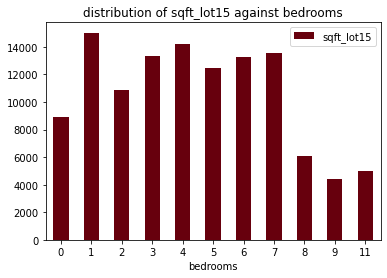

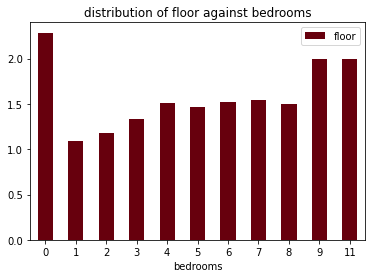

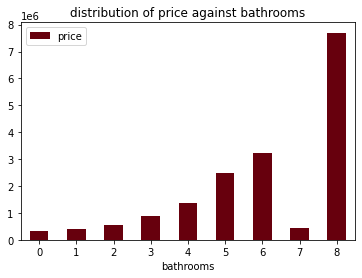

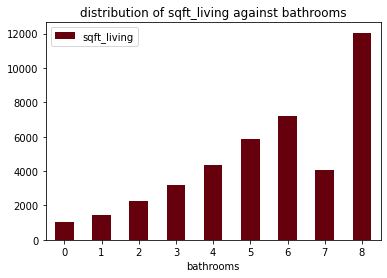

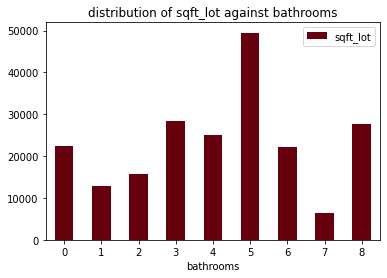

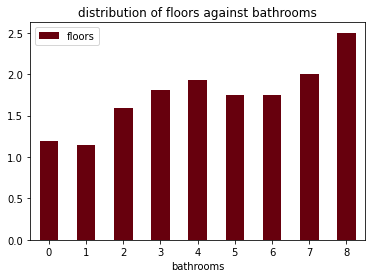

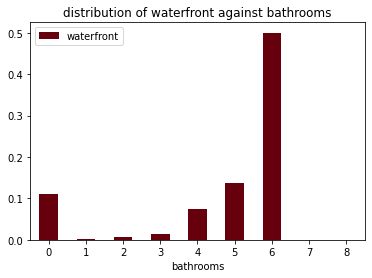

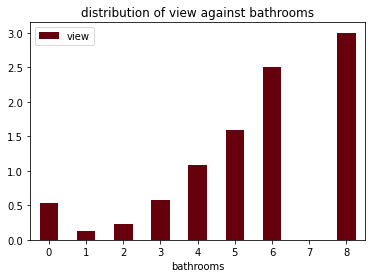

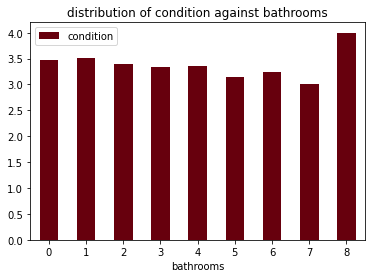

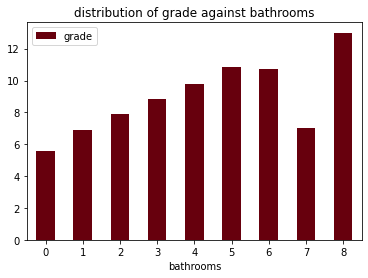

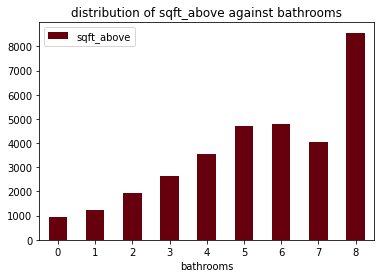

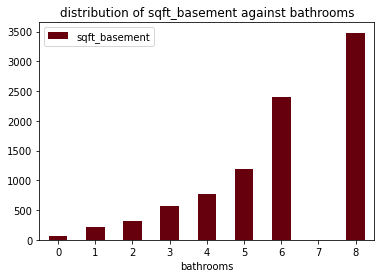

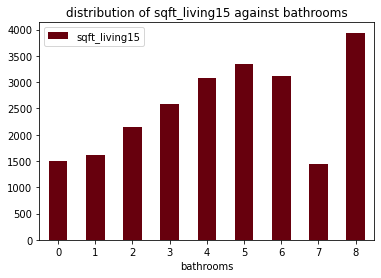

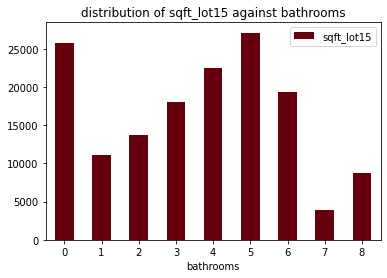

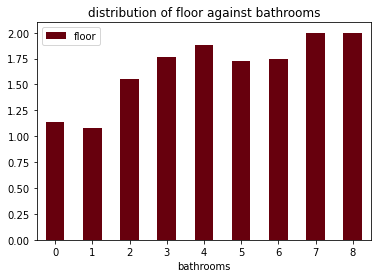

In [82]:
groupers=['bedrooms','bathrooms']
other=['price','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
        'sqft_living15','sqft_lot15','floor']
for grp in groupers:
  for othr in other:
    grpr=[]
    othrr=[]
    grpr.append(grp)
    othrr.append(othr)
    plots(grpr,othrr)

In [63]:
import random

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

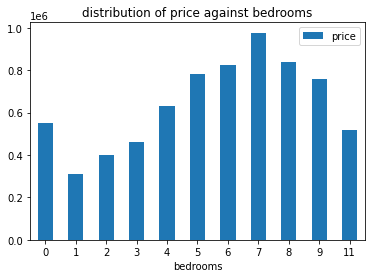

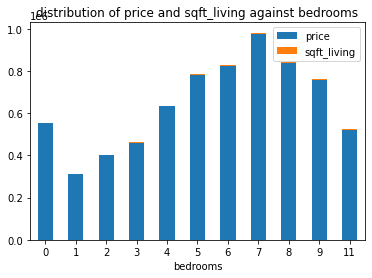

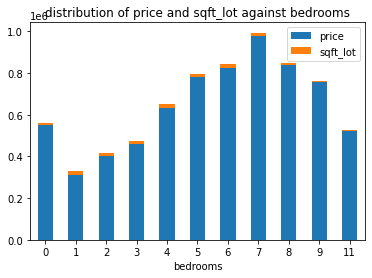

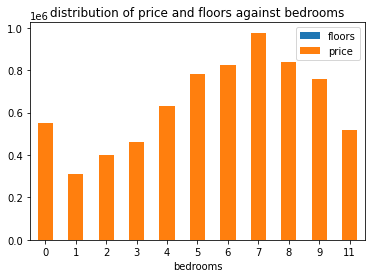

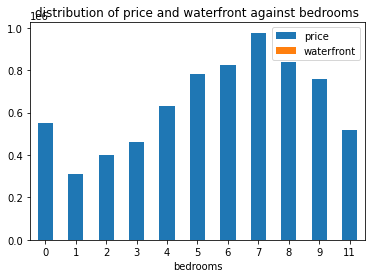

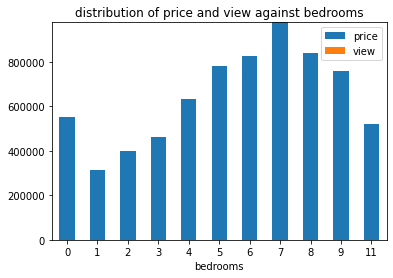

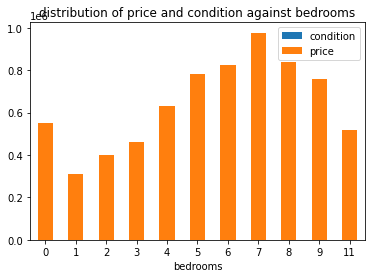

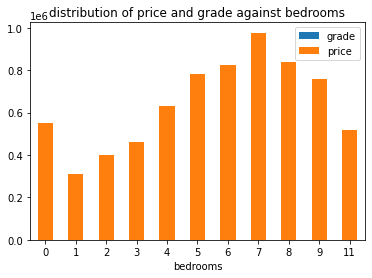

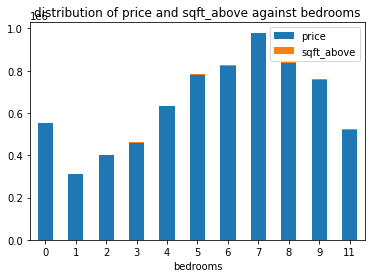

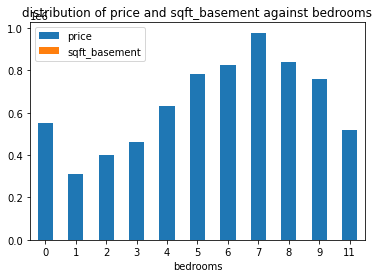

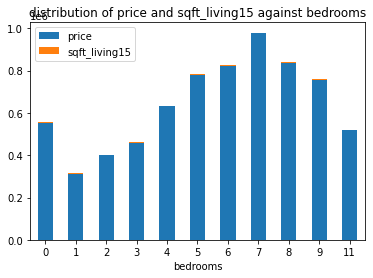

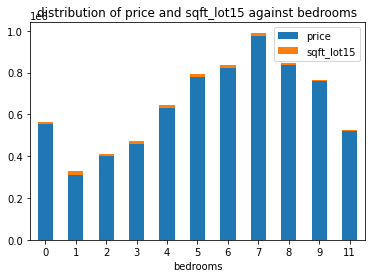

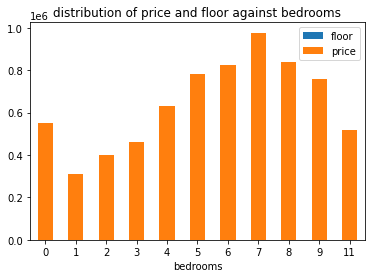

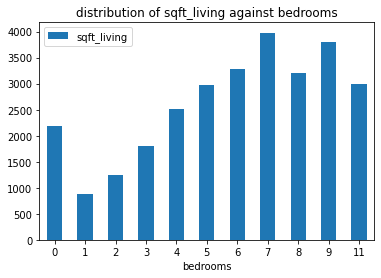

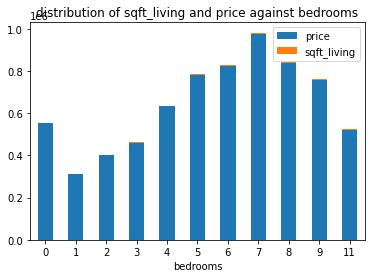

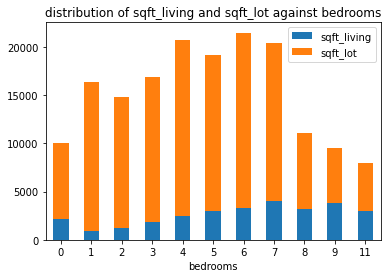

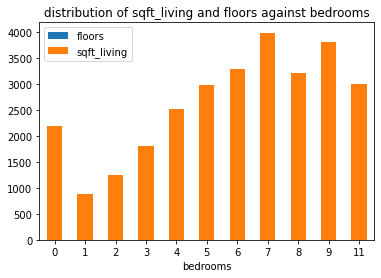

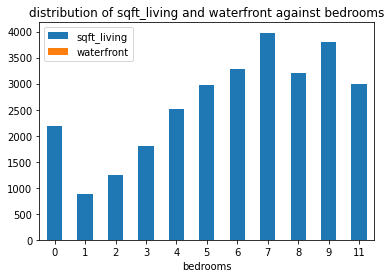

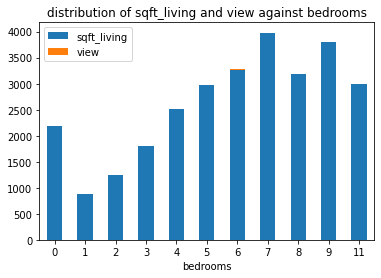

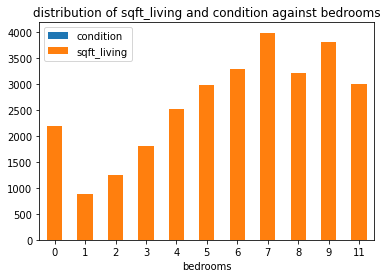

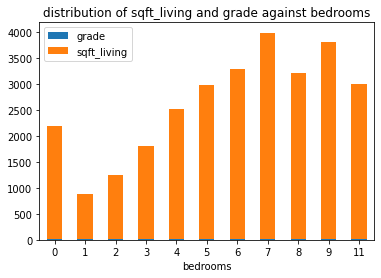

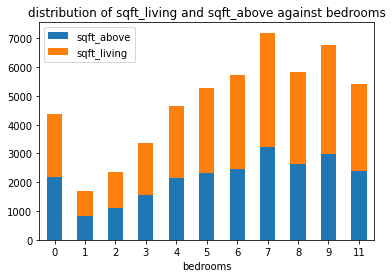

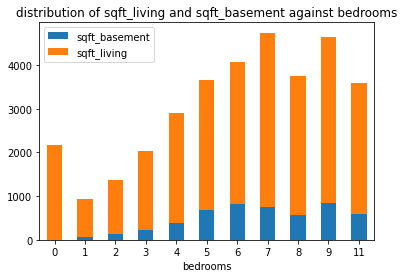

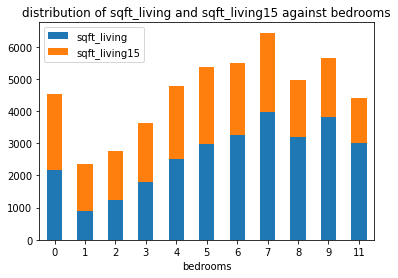

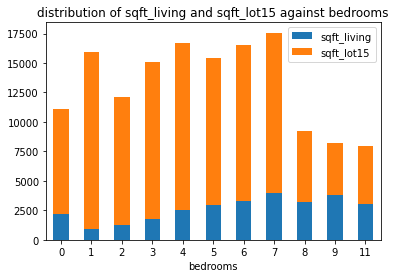

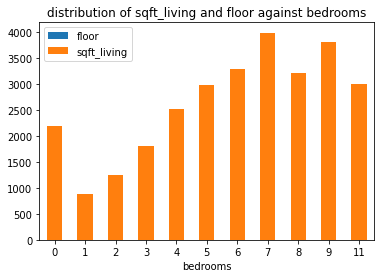

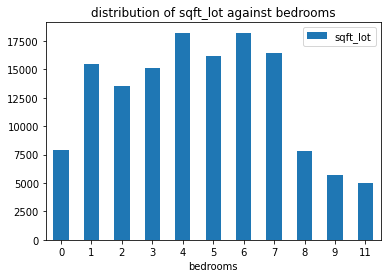

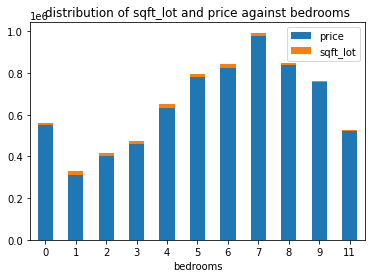

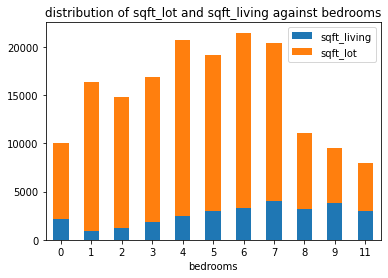

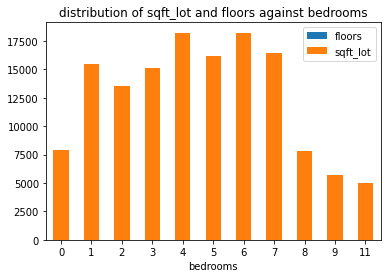

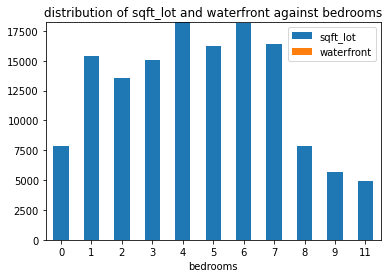

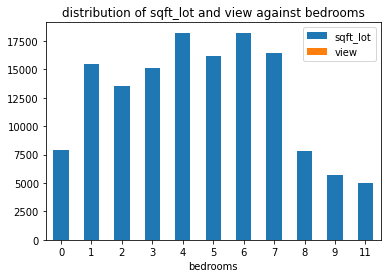

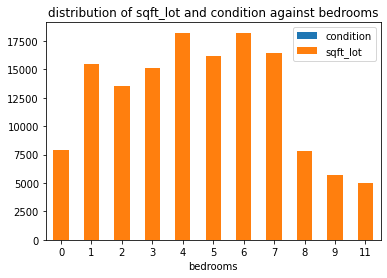

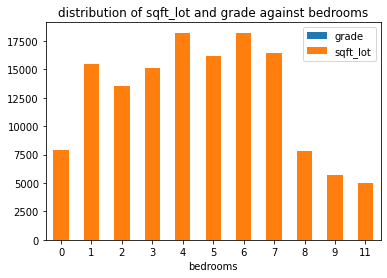

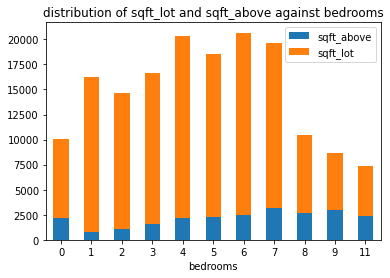

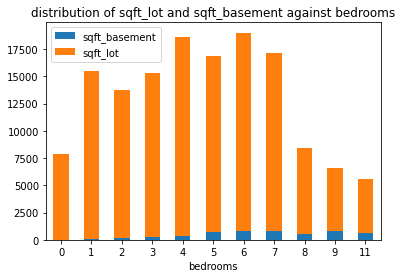

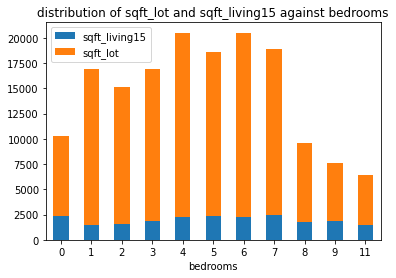

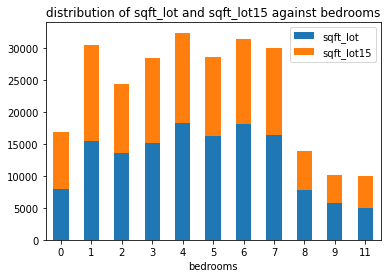

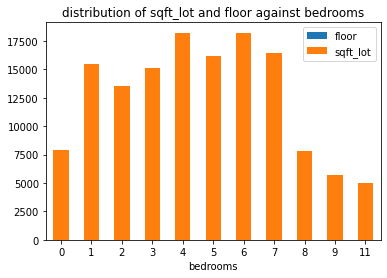

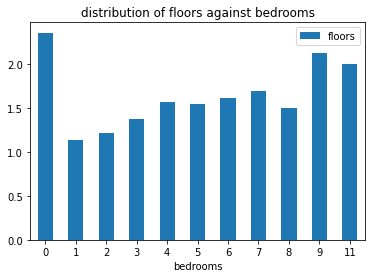

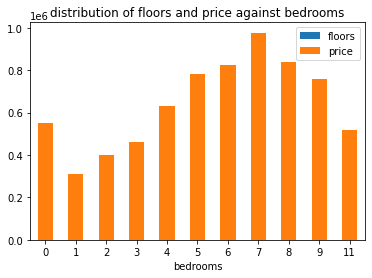

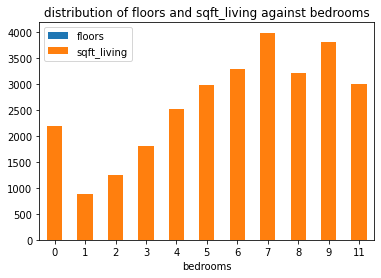

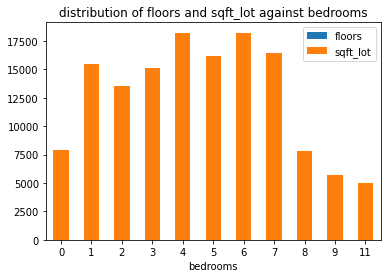

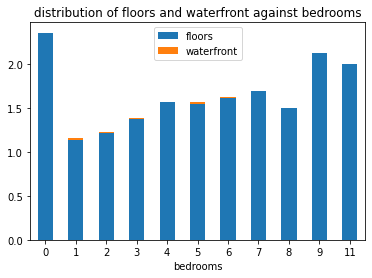

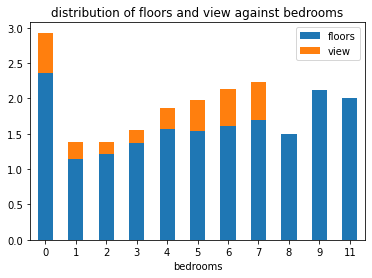

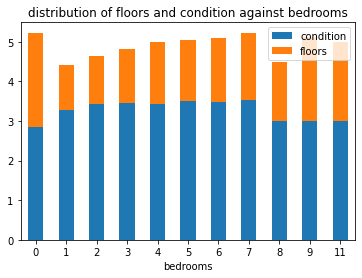

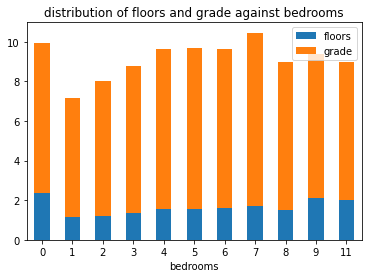

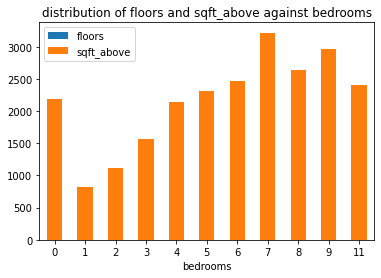

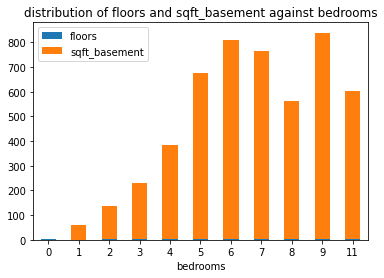

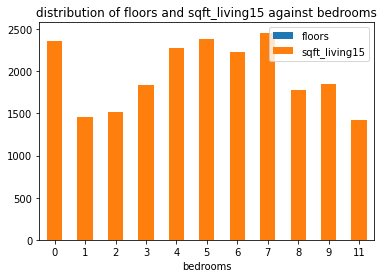

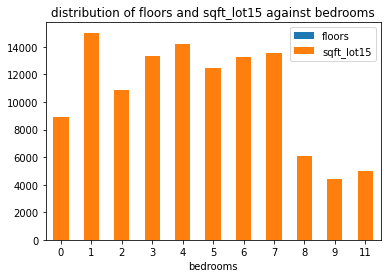

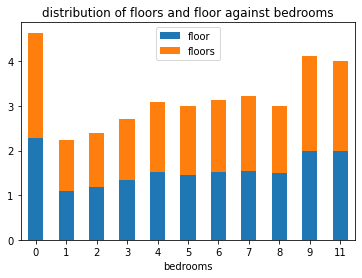

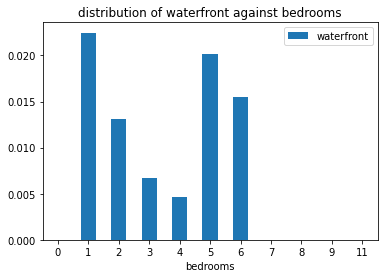

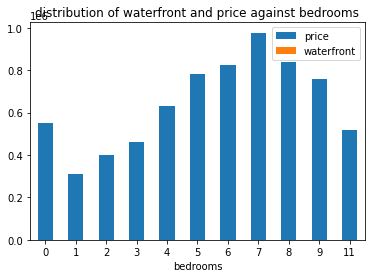

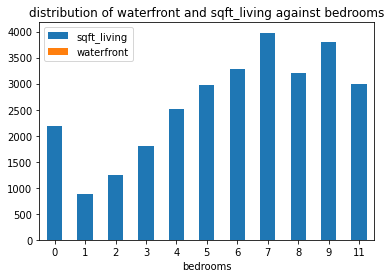

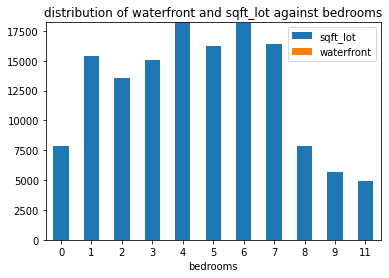

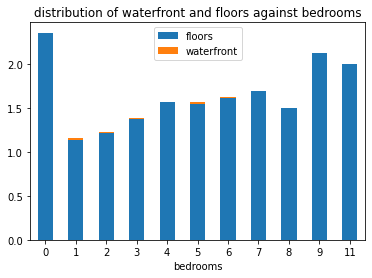

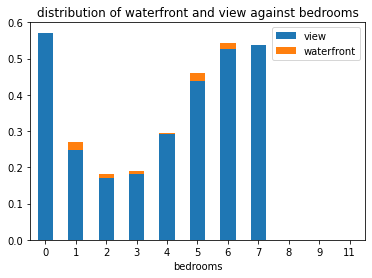

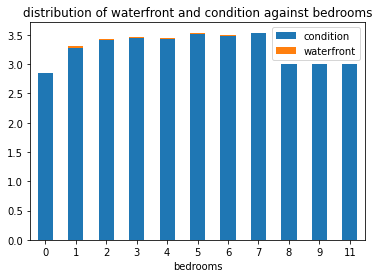

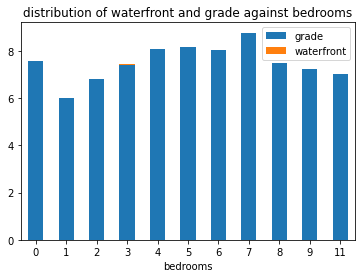

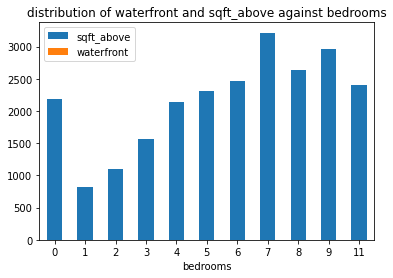

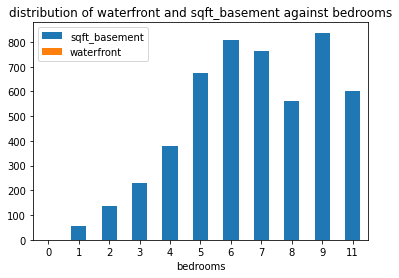

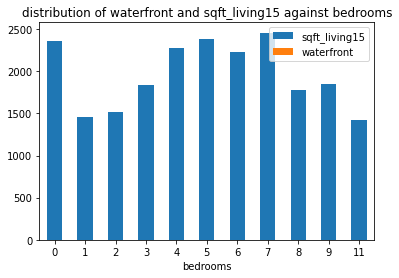

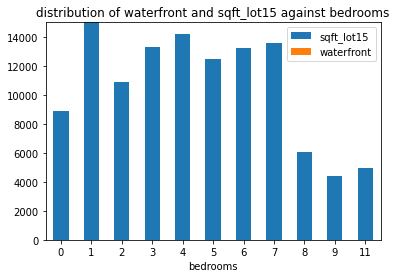

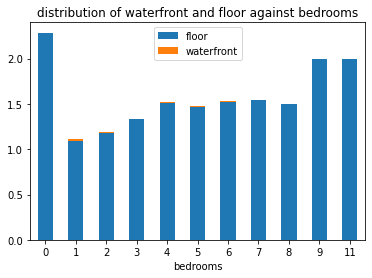

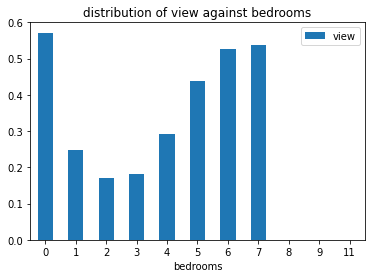

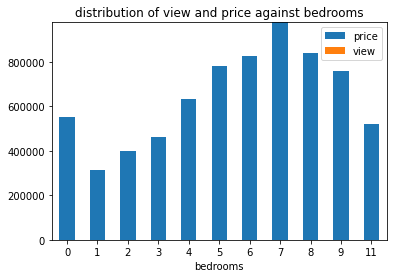

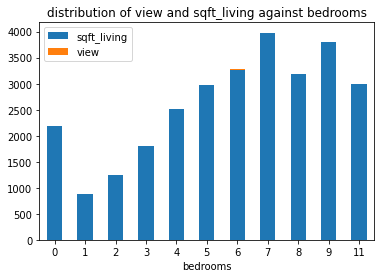

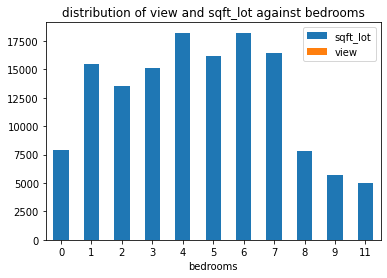

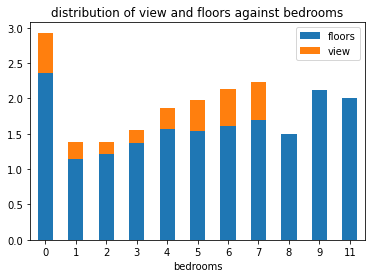

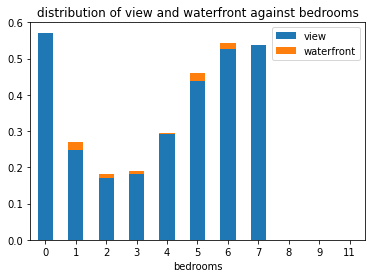

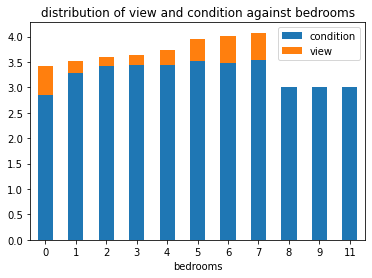

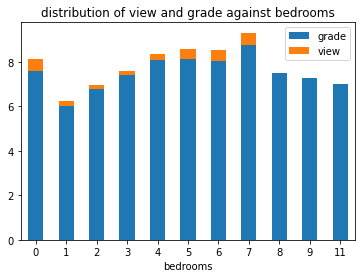

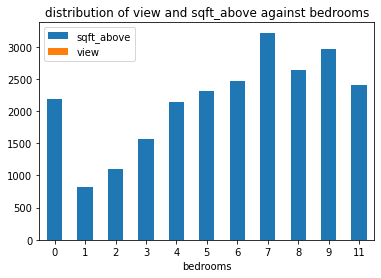

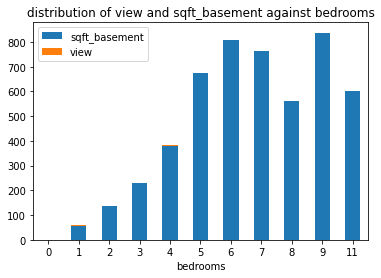

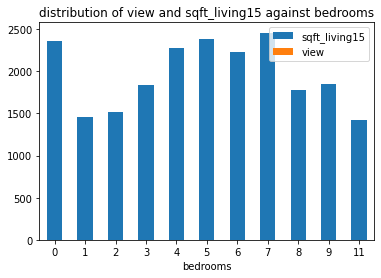

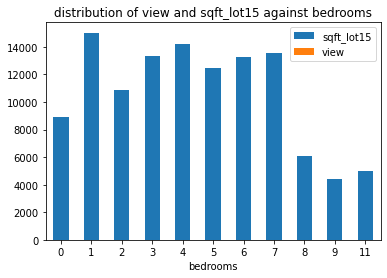

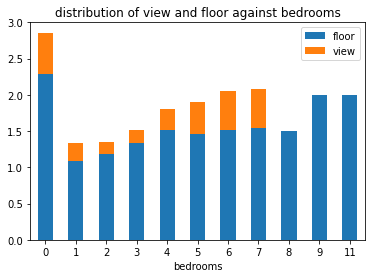

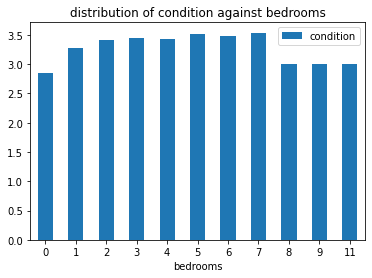

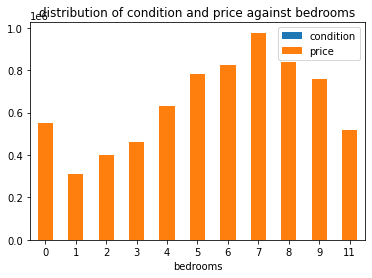

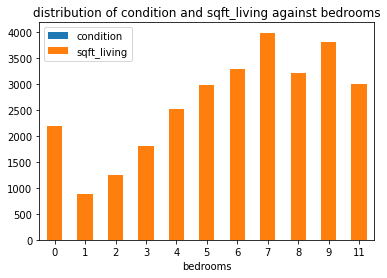

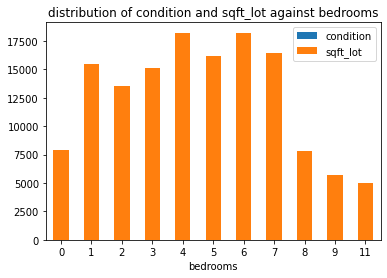

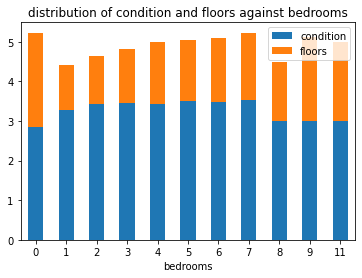

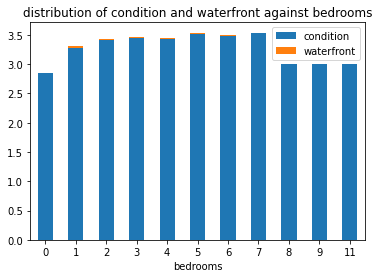

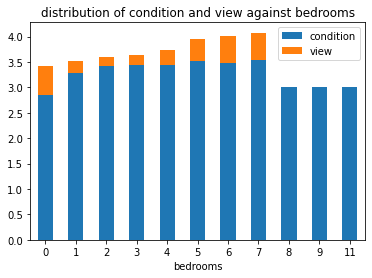

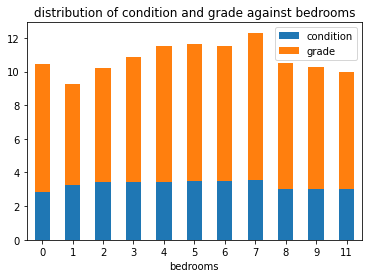

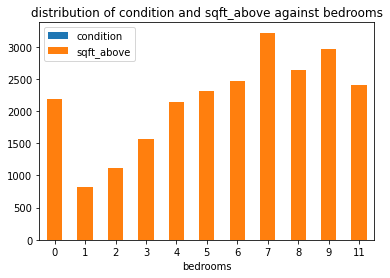

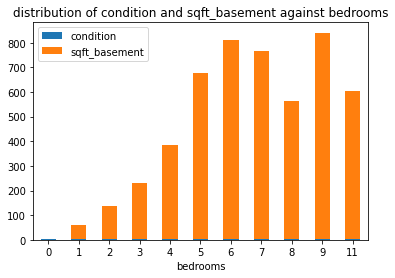

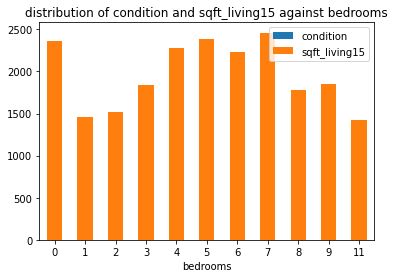

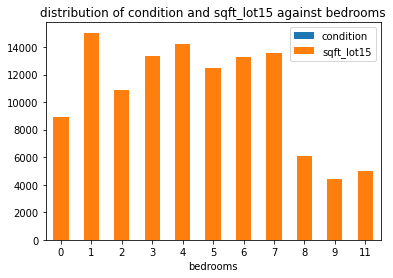

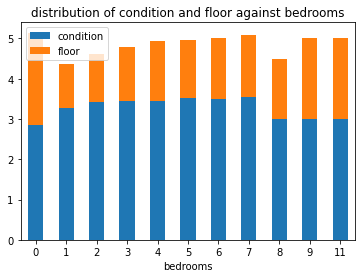

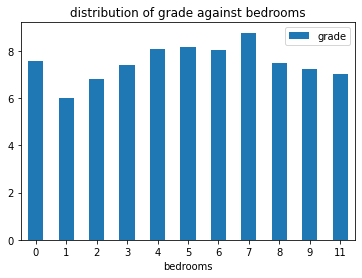

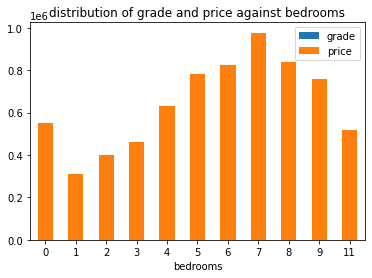

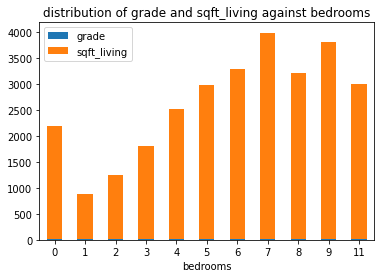

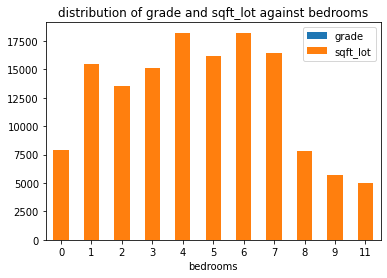

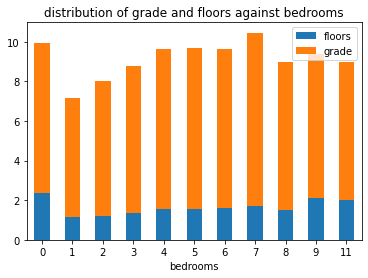

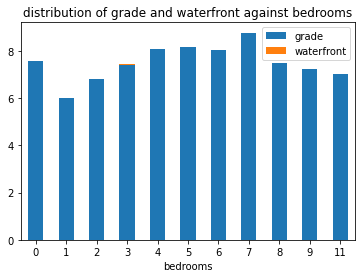

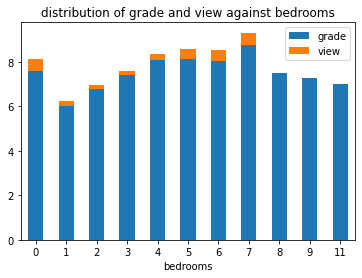

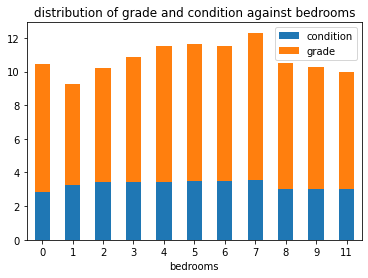

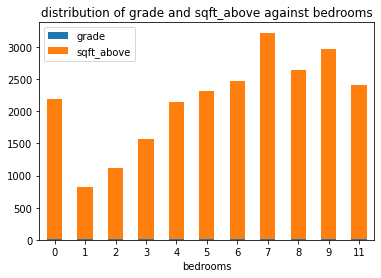

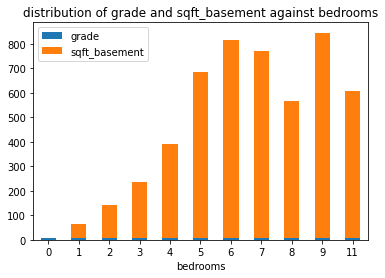

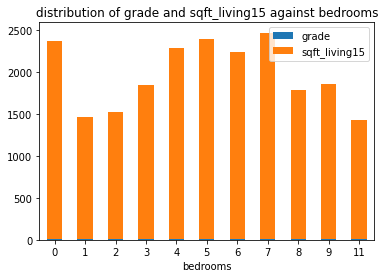

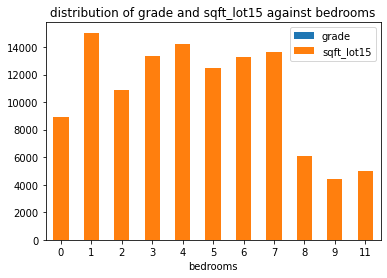

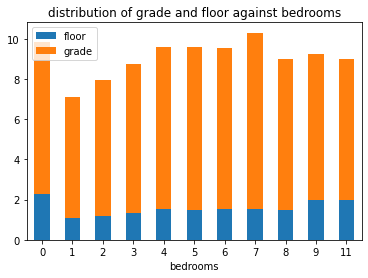

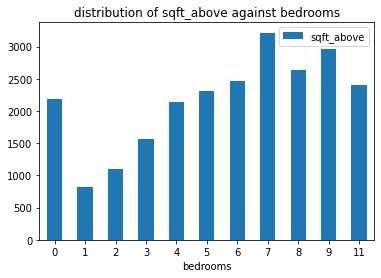

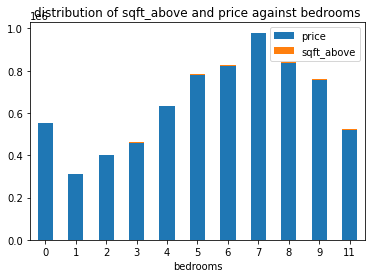

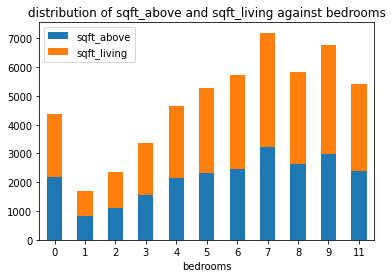

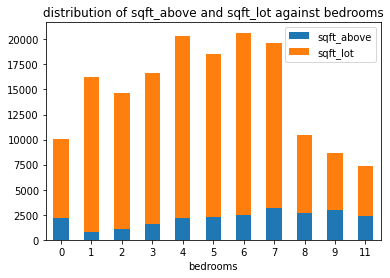

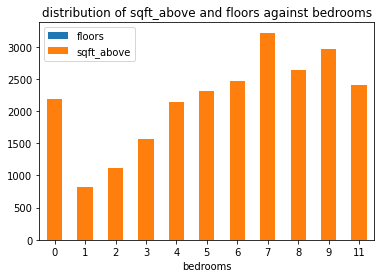

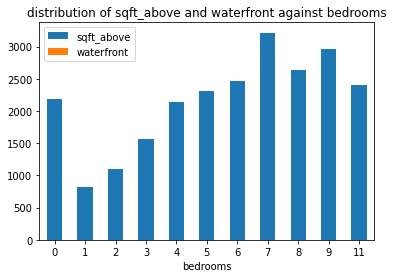

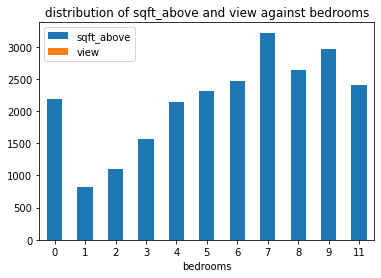

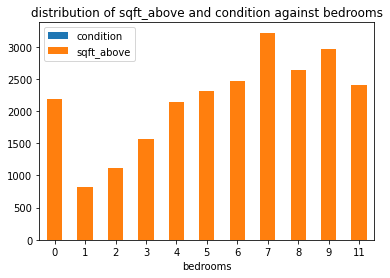

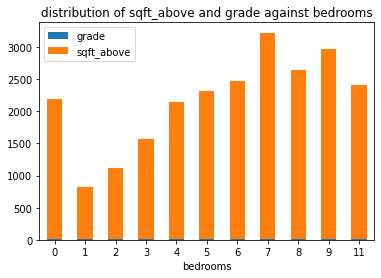

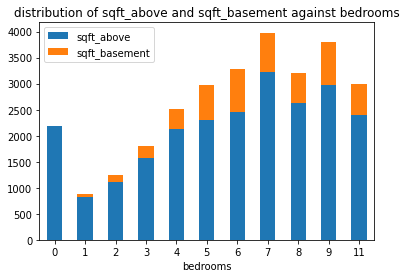

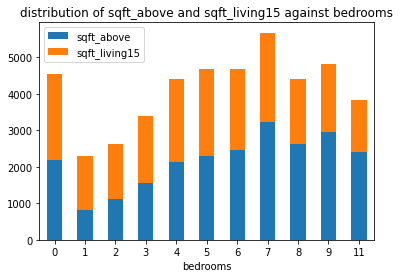

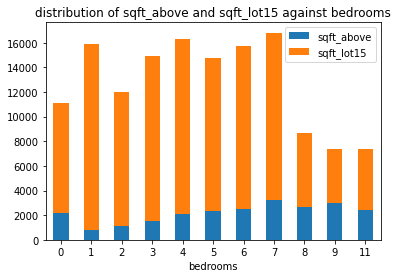

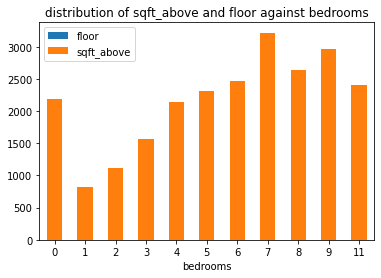

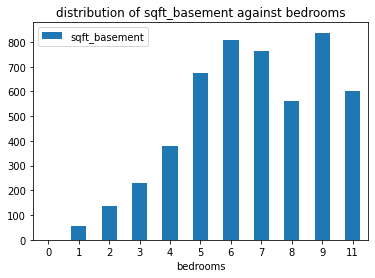

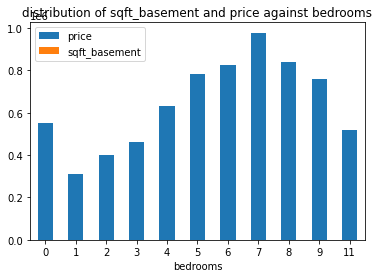

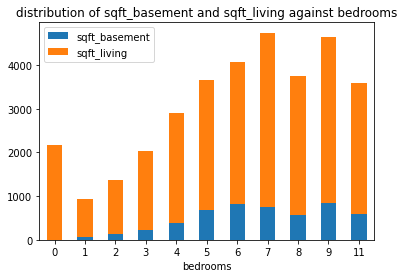

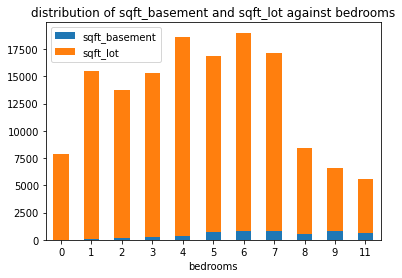

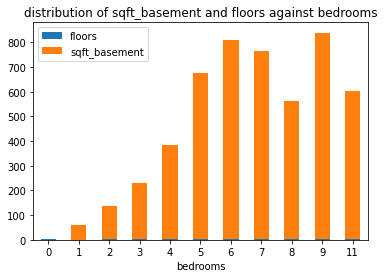

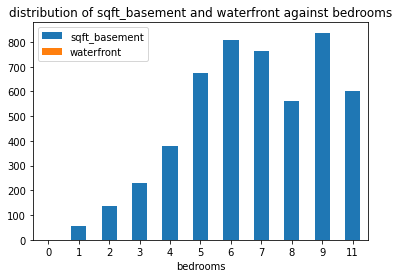

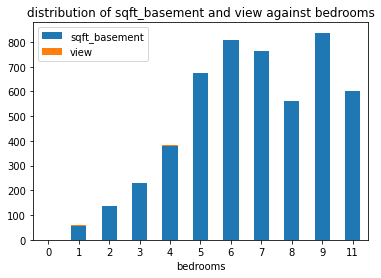

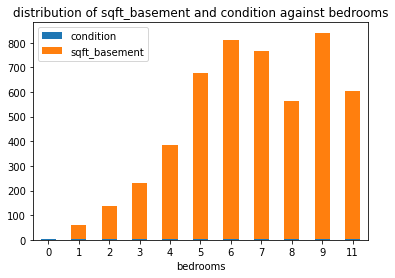

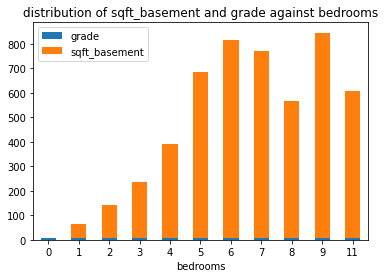

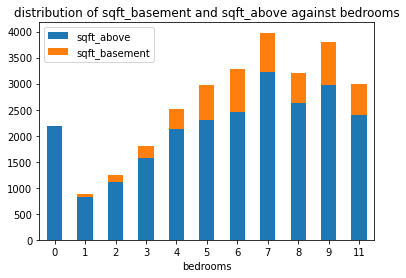

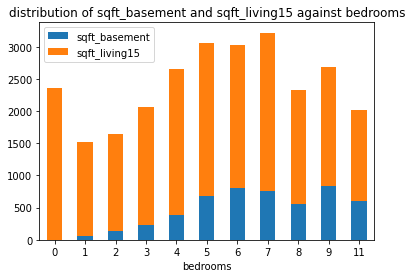

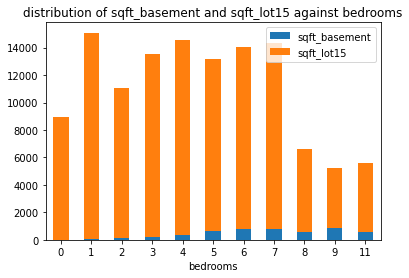

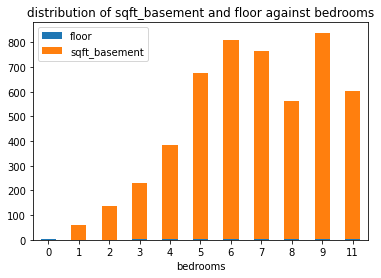

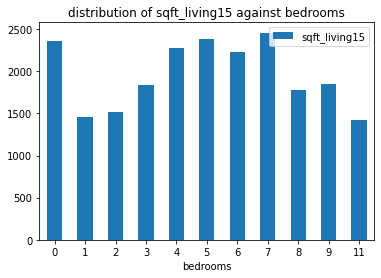

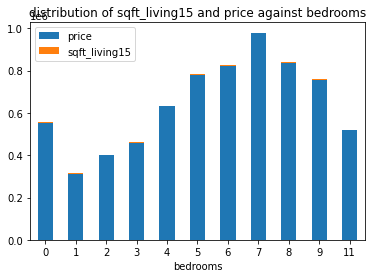

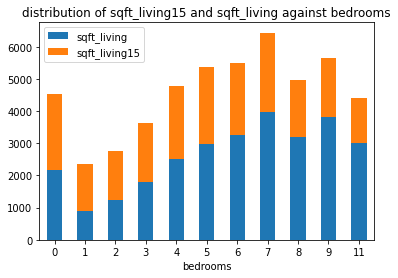

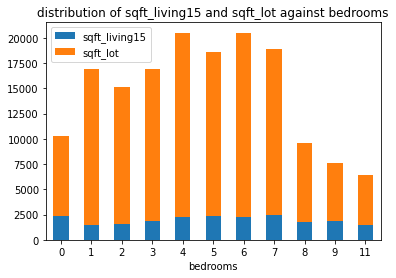

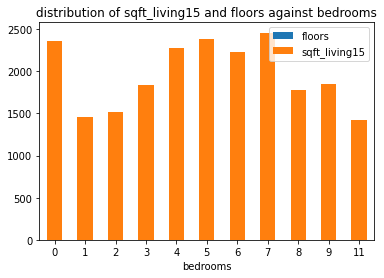

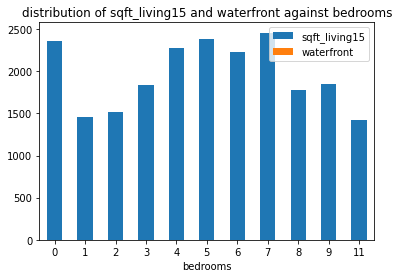

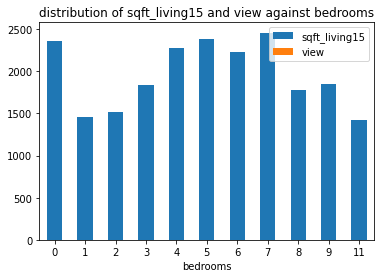

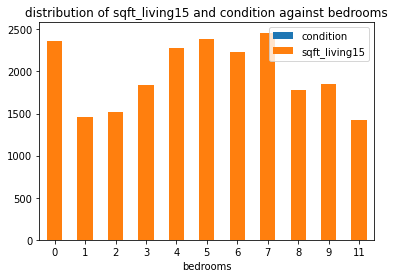

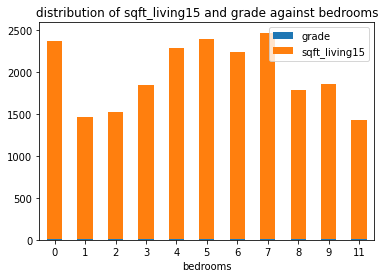

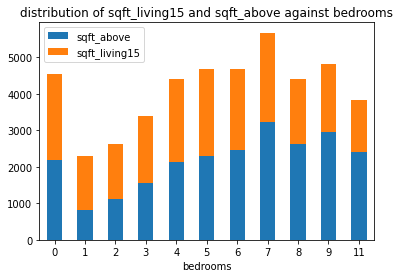

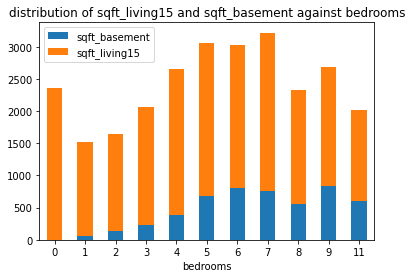

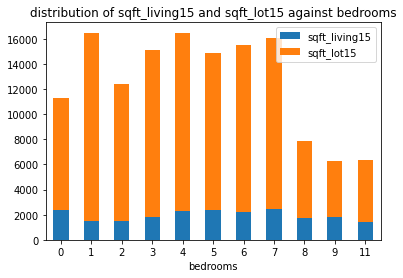

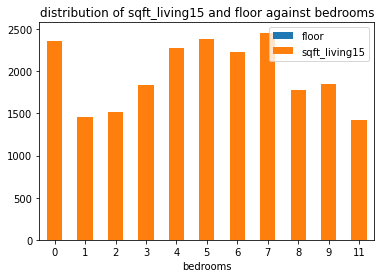

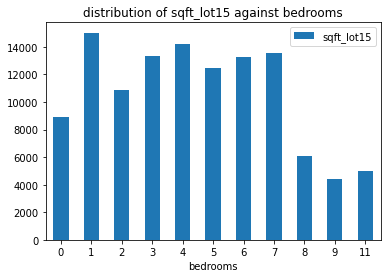

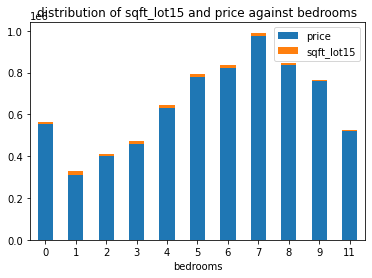

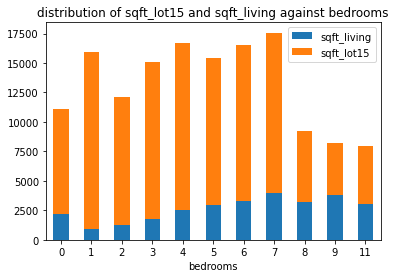

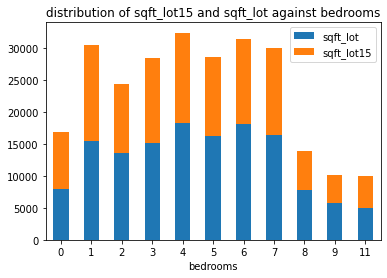

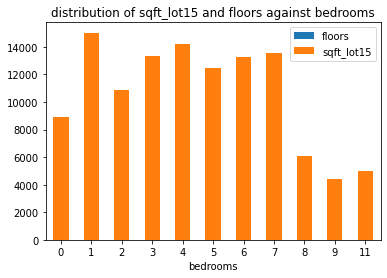

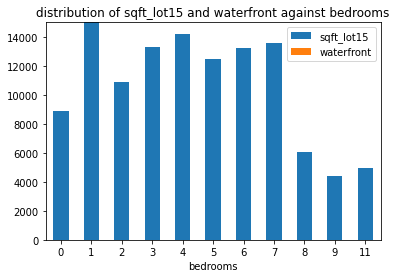

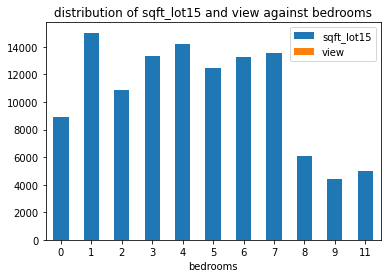

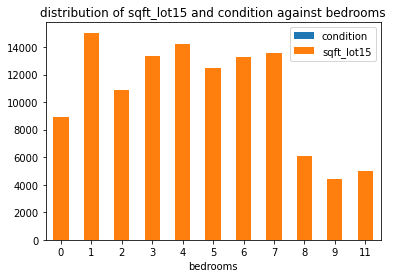

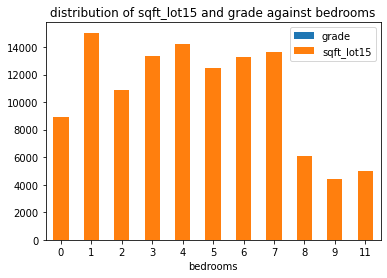

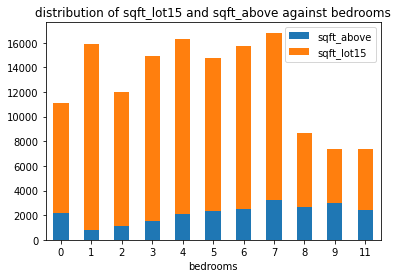

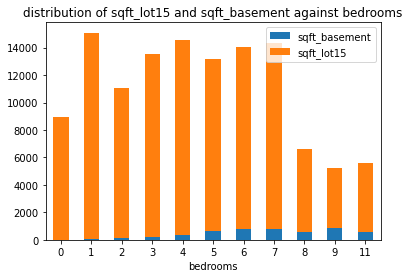

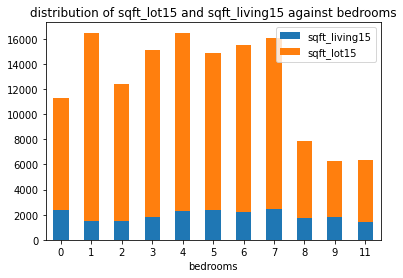

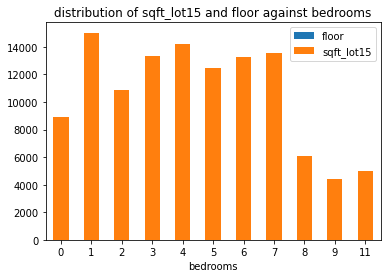

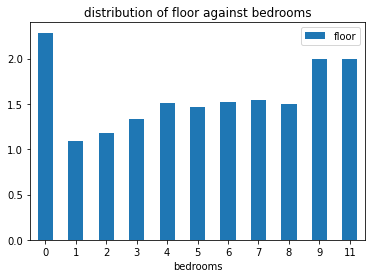

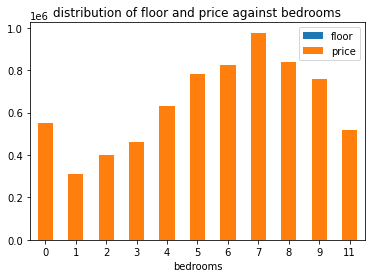

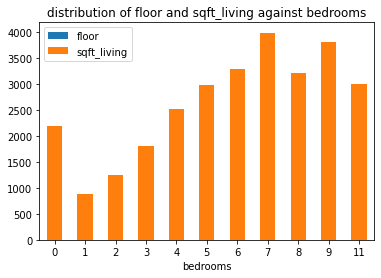

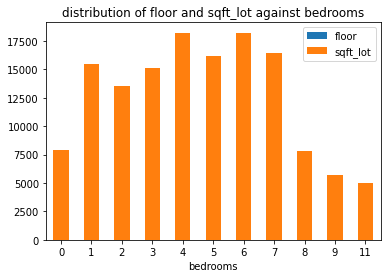

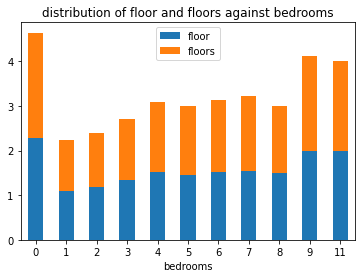

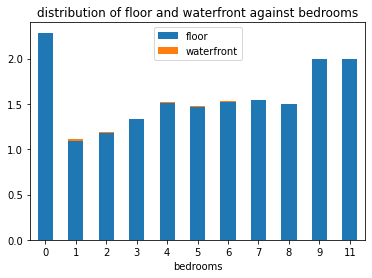

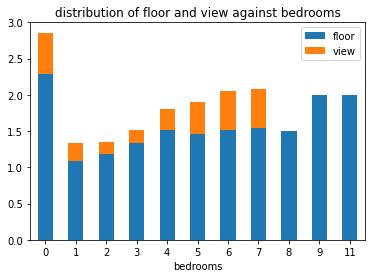

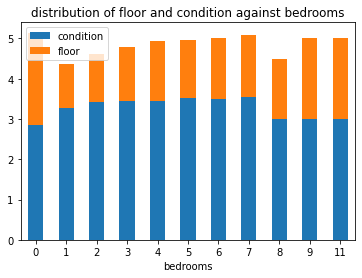

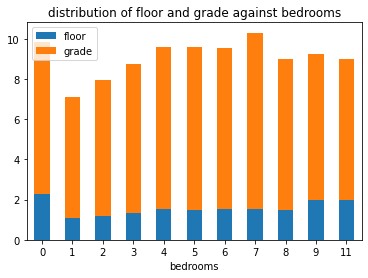

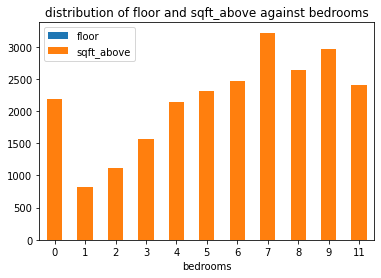

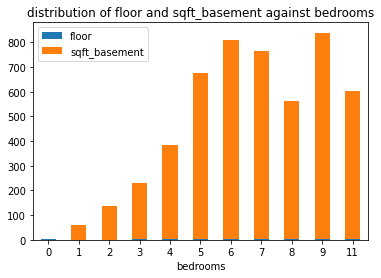

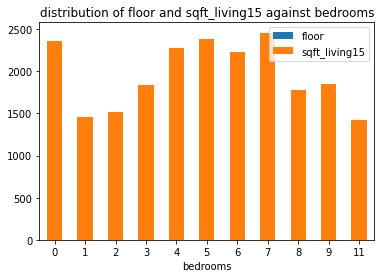

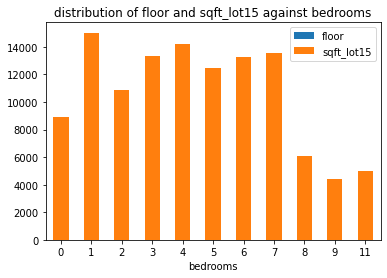

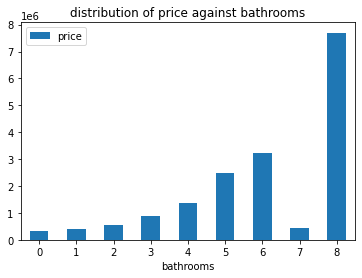

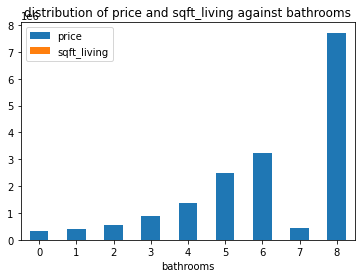

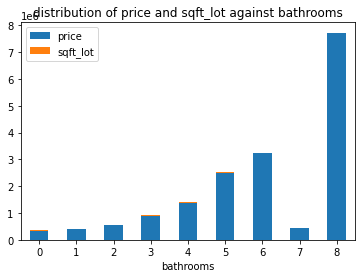

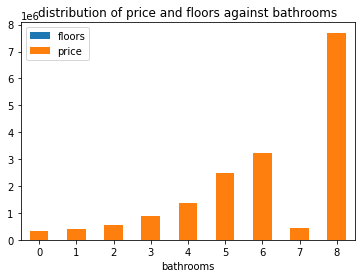

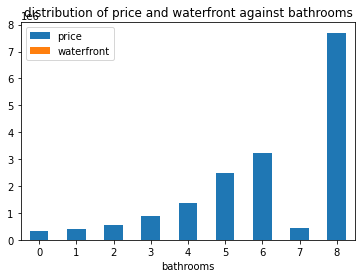

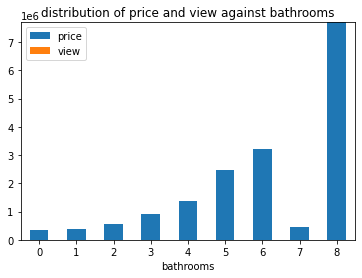

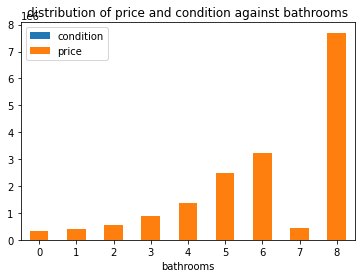

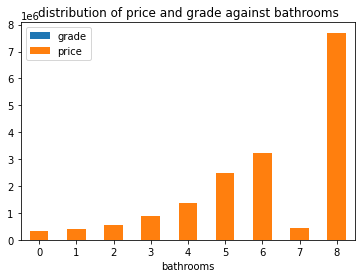

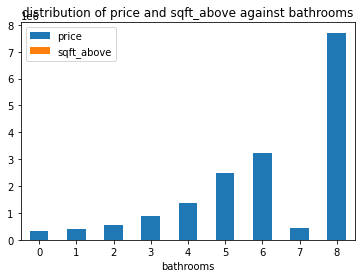

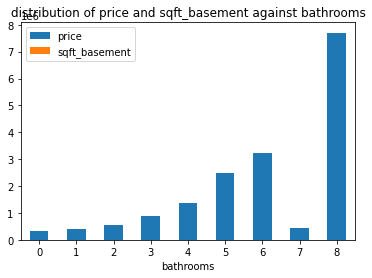

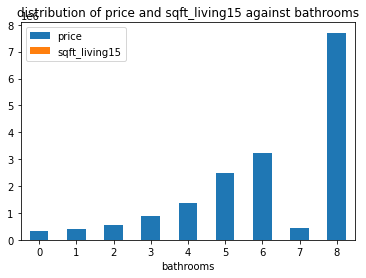

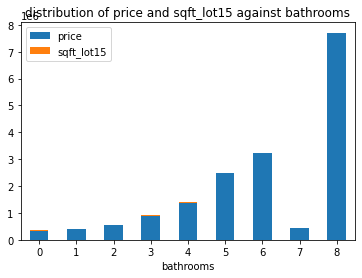

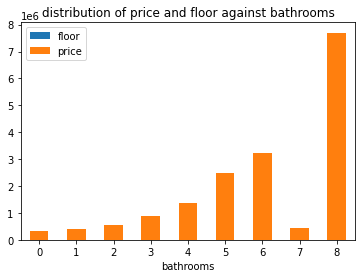

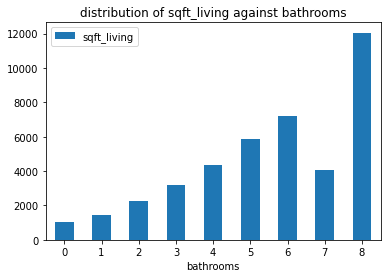

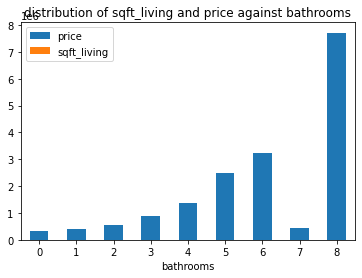

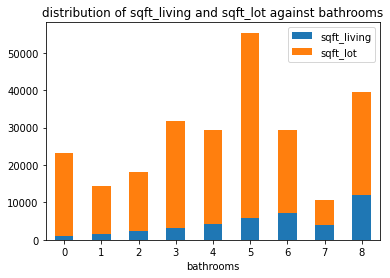

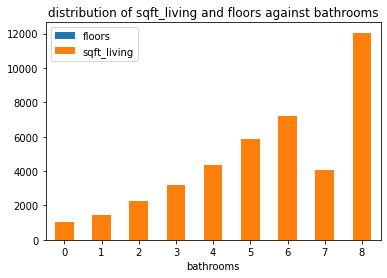

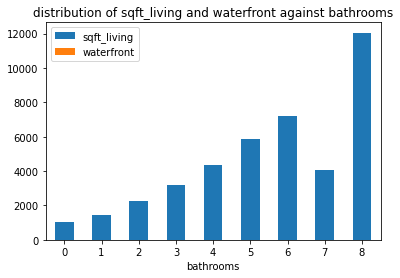

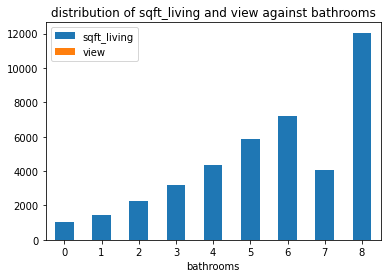

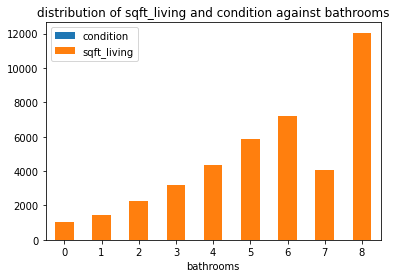

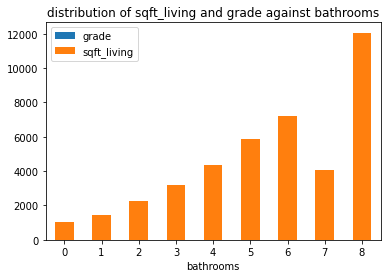

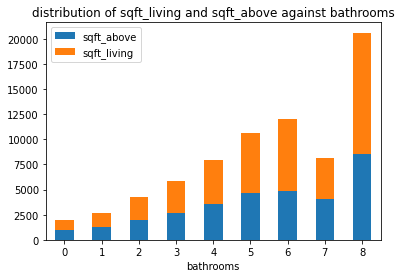

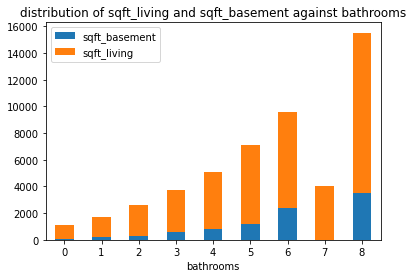

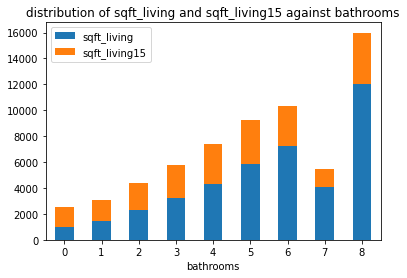

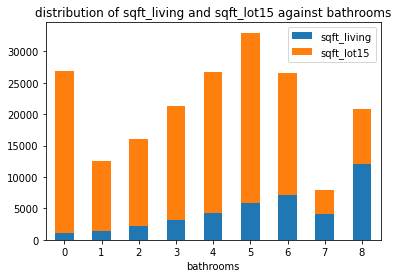

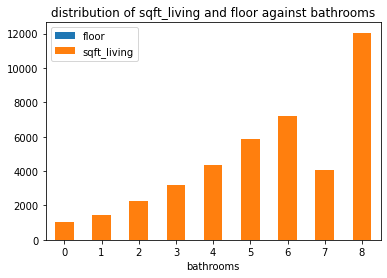

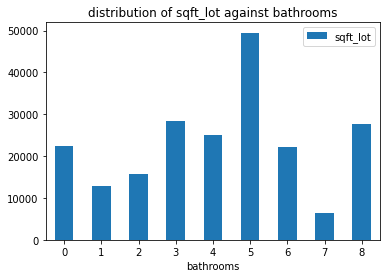

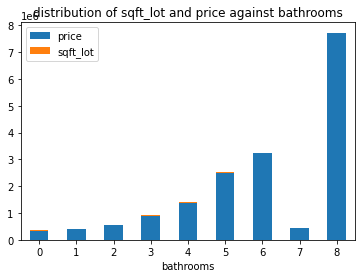

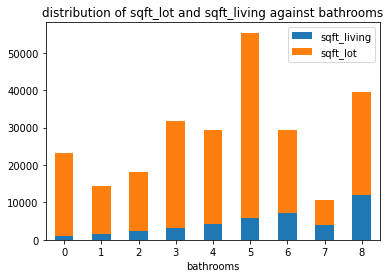

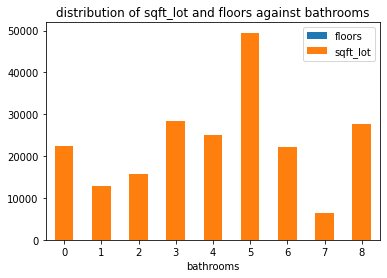

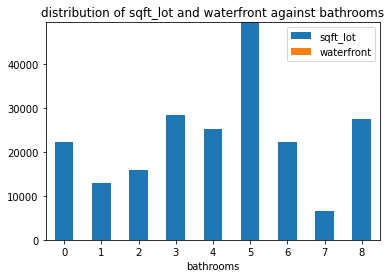

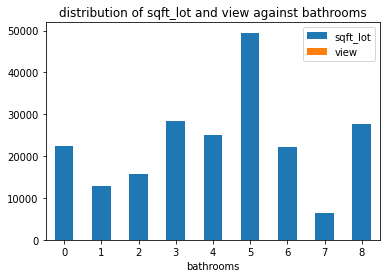

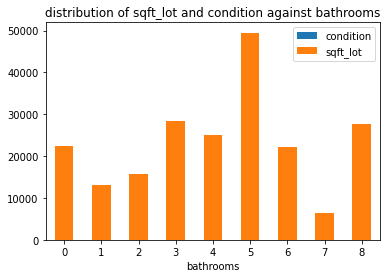

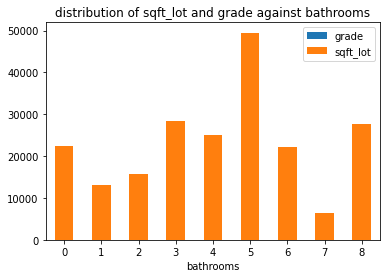

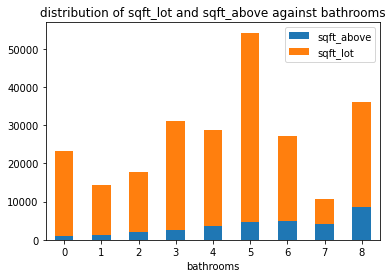

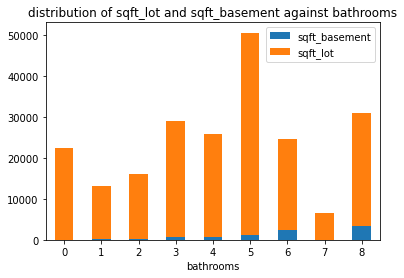

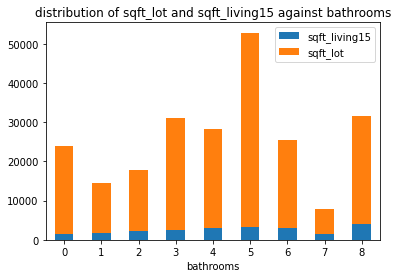

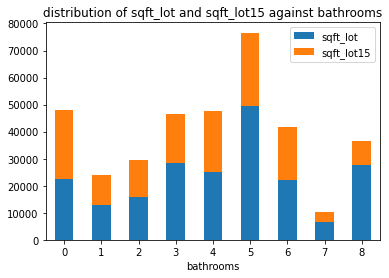

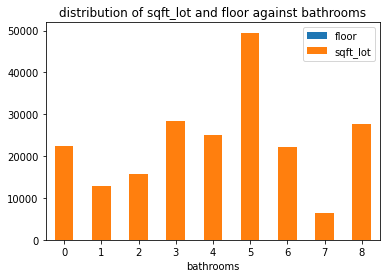

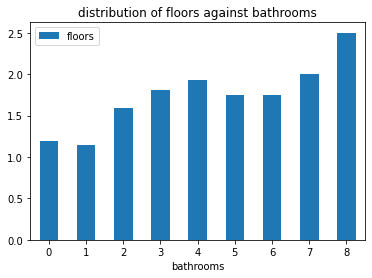

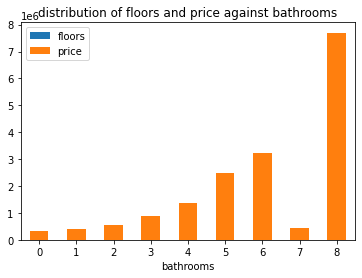

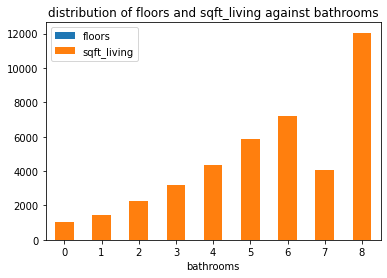

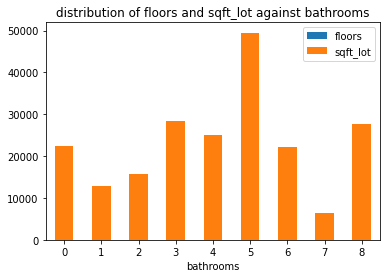

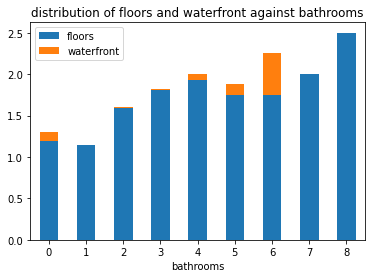

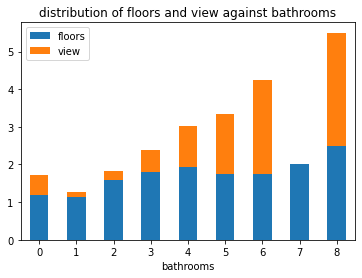

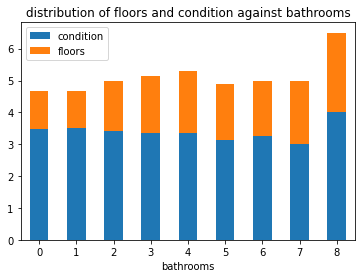

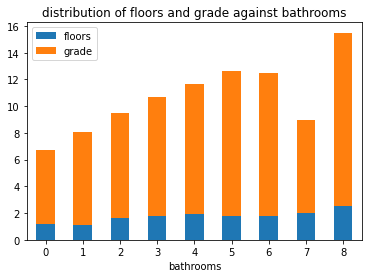

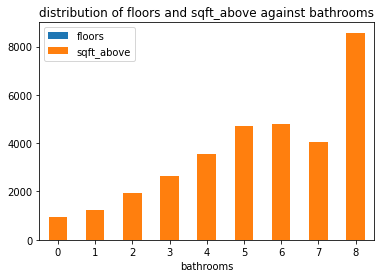

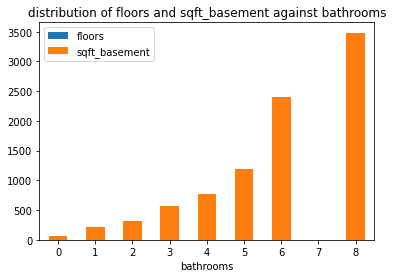

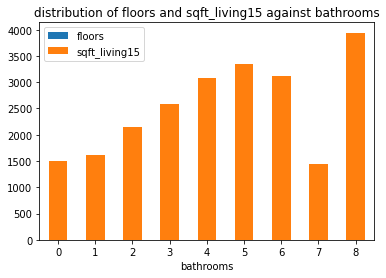

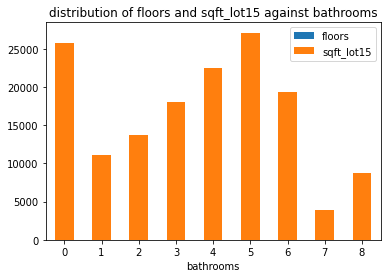

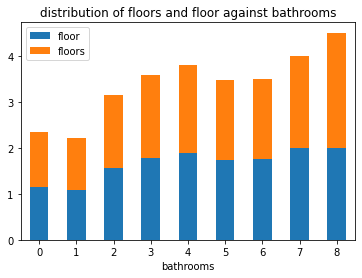

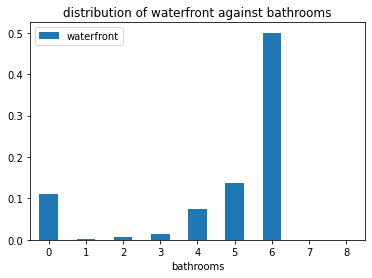

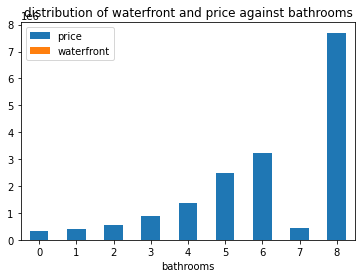

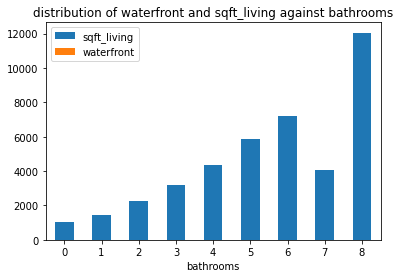

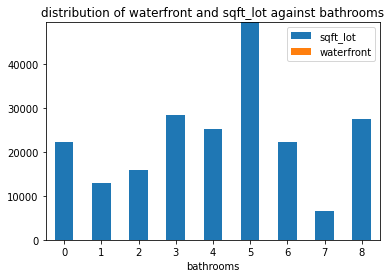

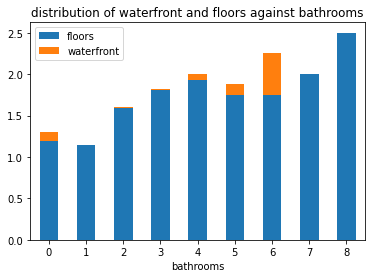

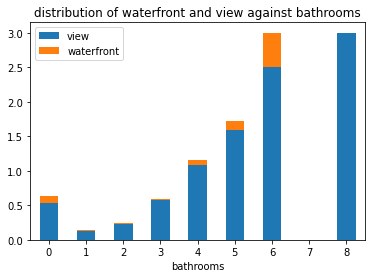

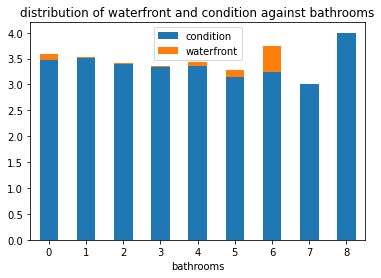

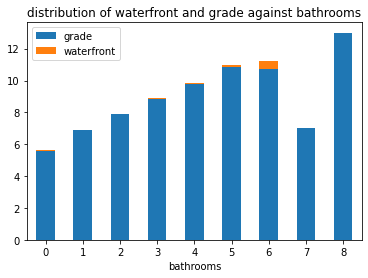

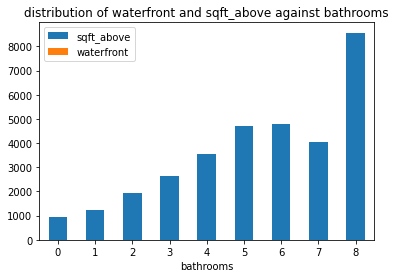

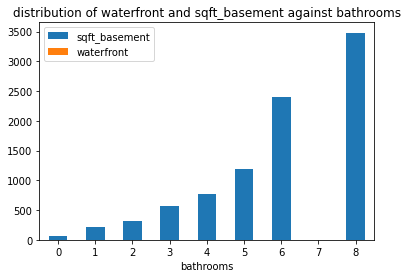

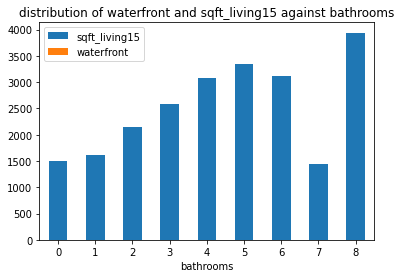

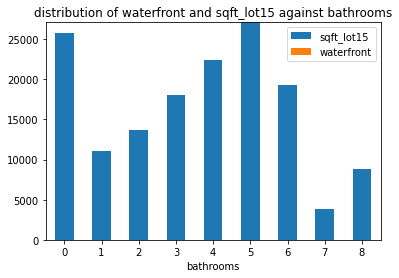

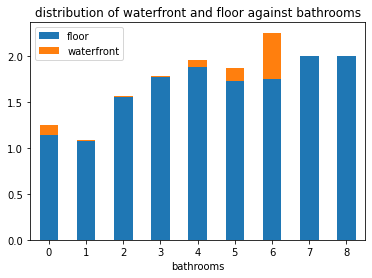

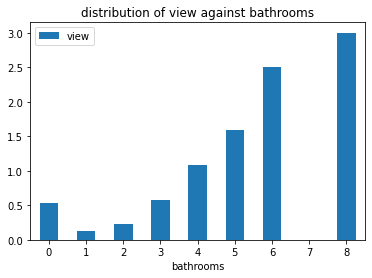

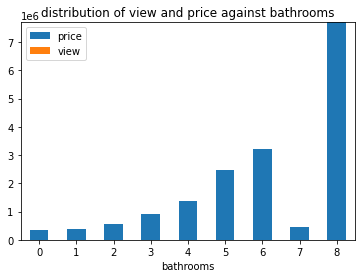

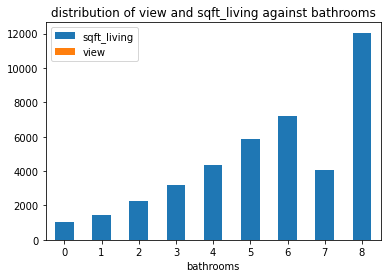

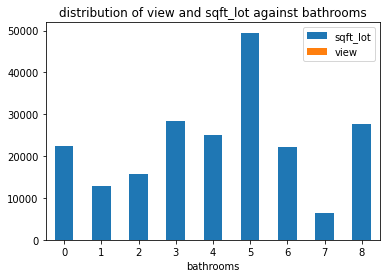

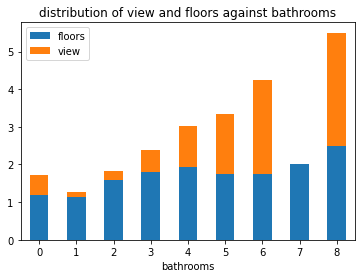

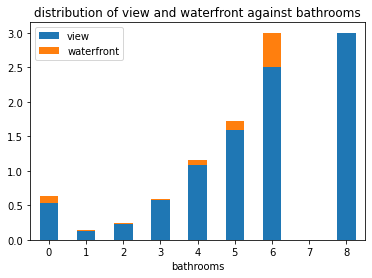

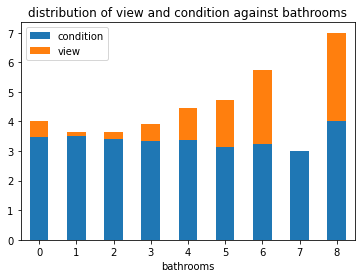

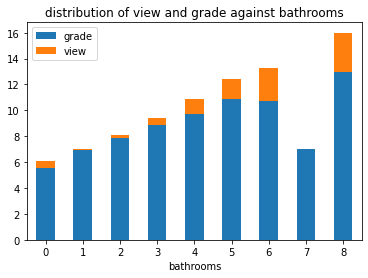

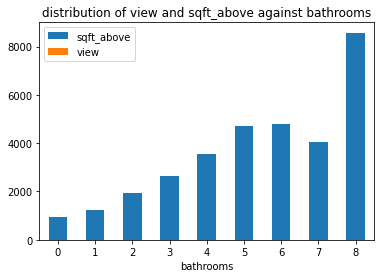

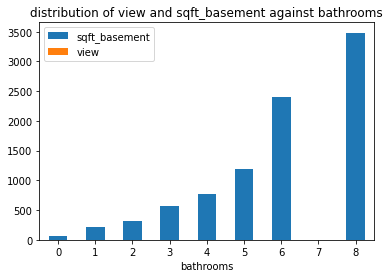

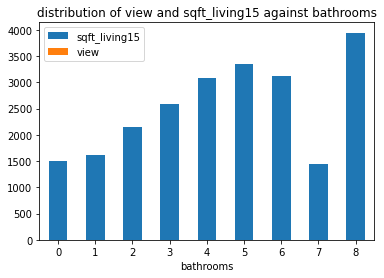

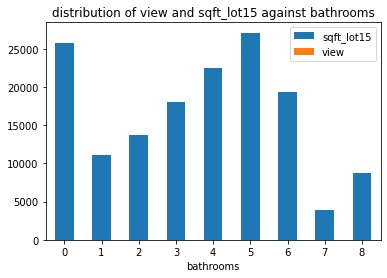

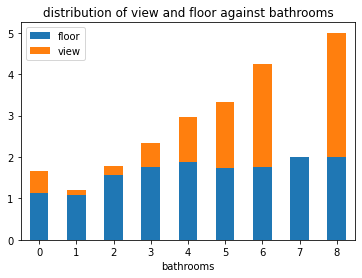

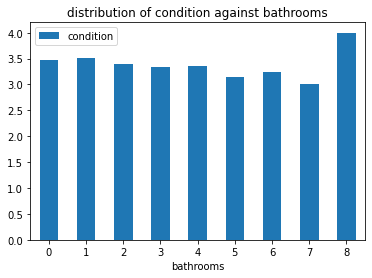

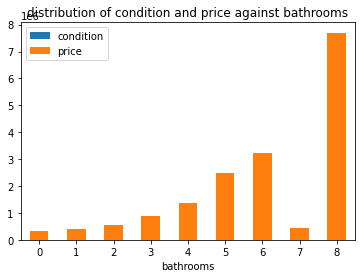

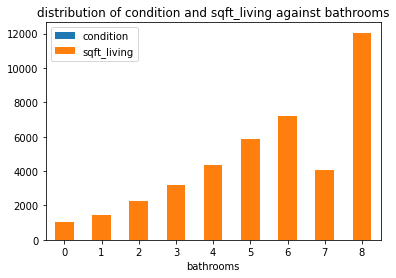

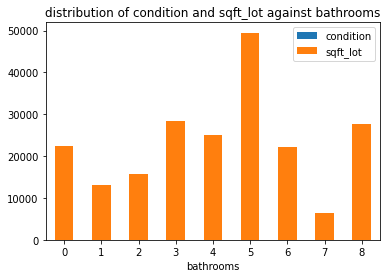

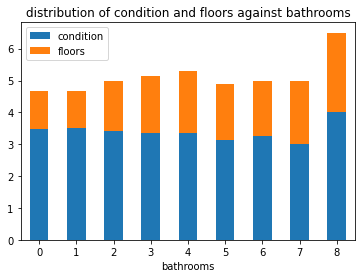

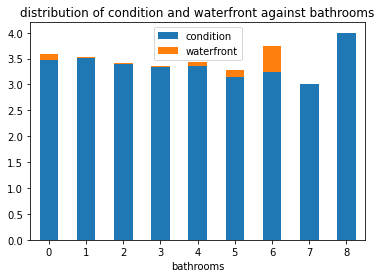

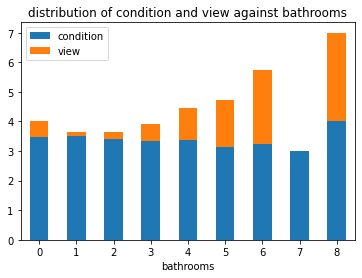

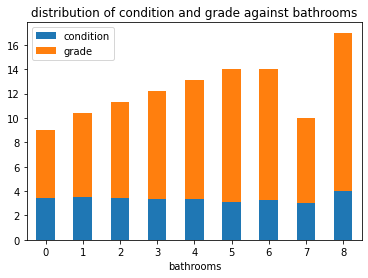

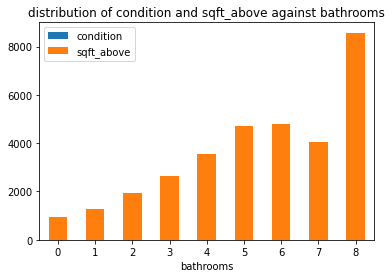

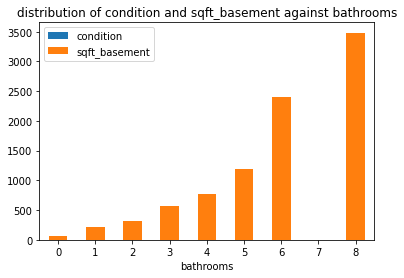

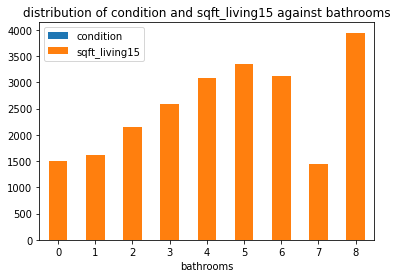

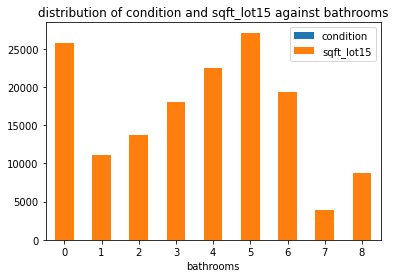

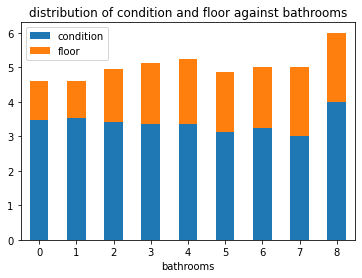

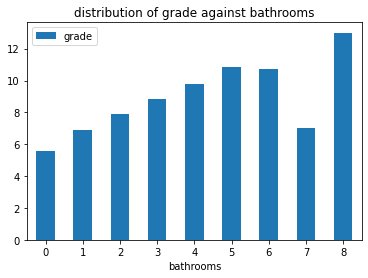

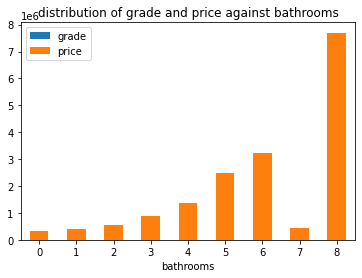

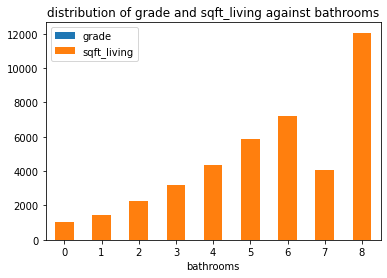

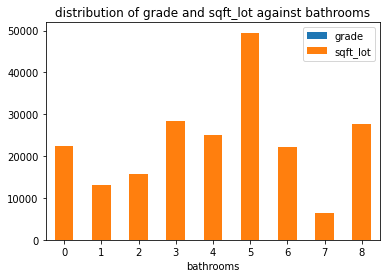

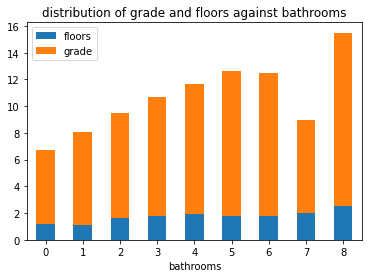

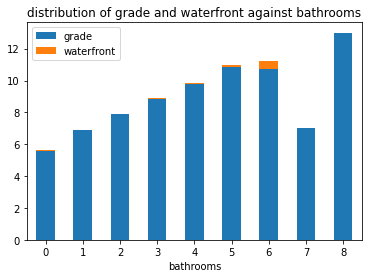

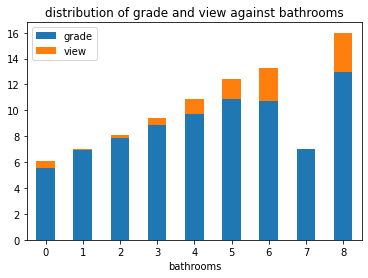

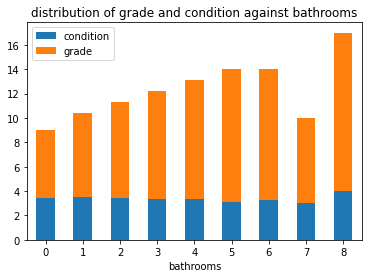

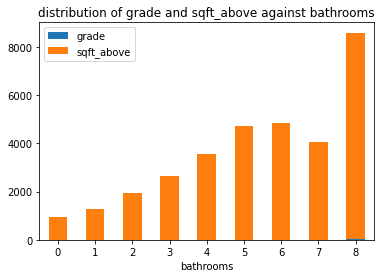

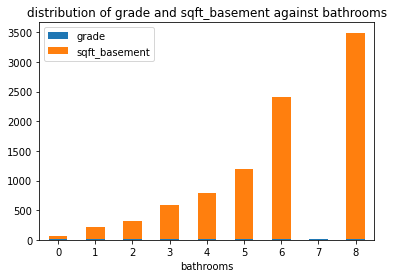

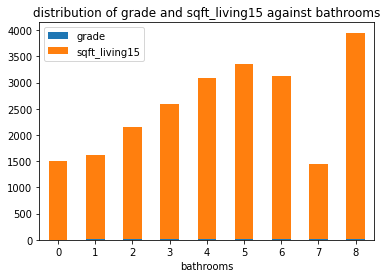

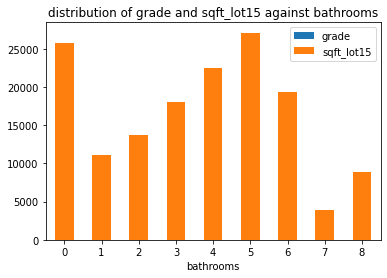

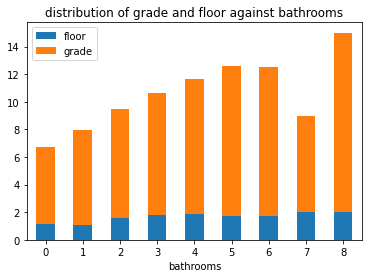

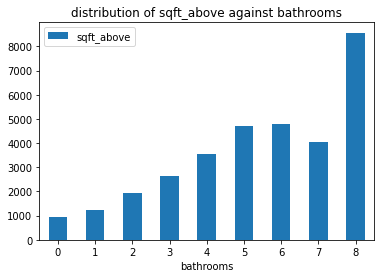

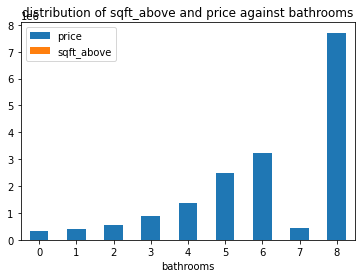

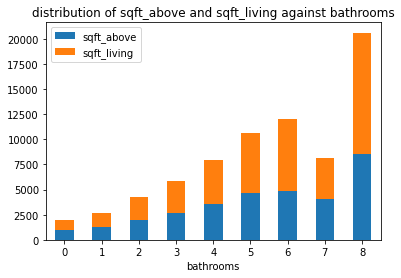

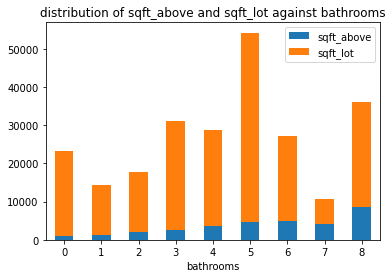

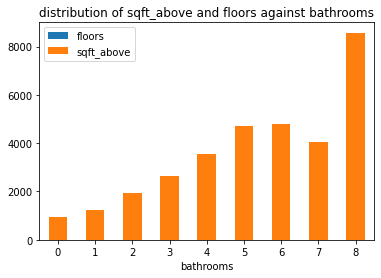

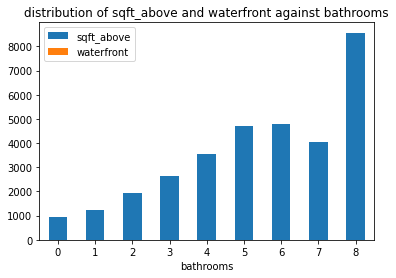

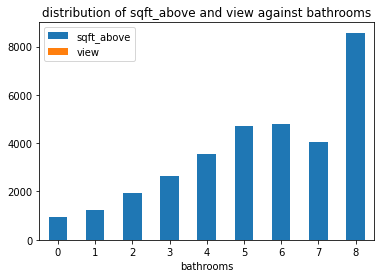

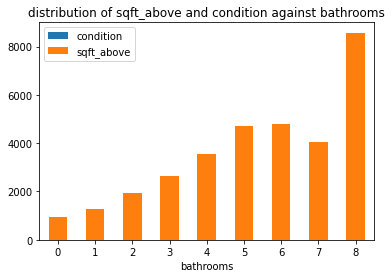

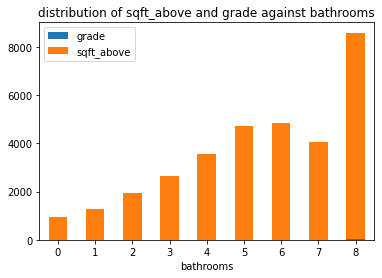

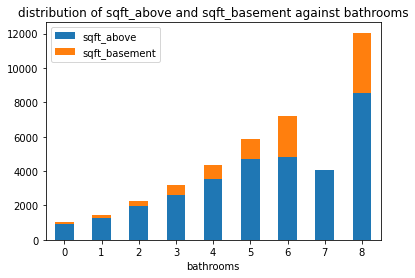

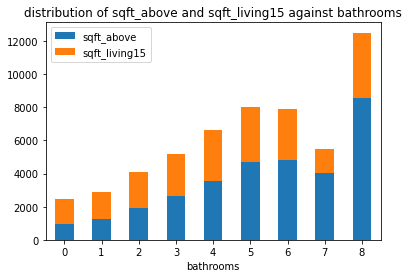

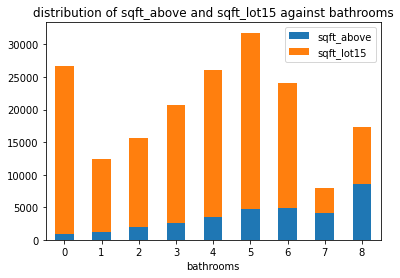

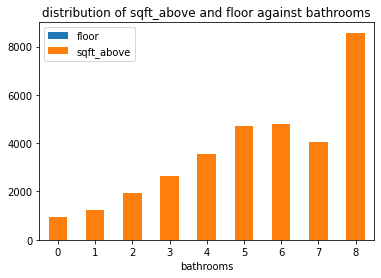

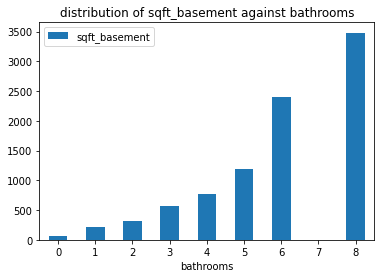

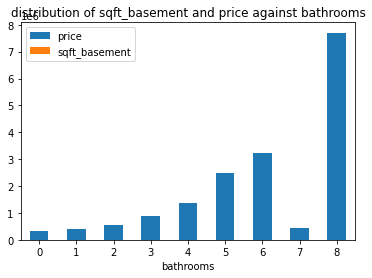

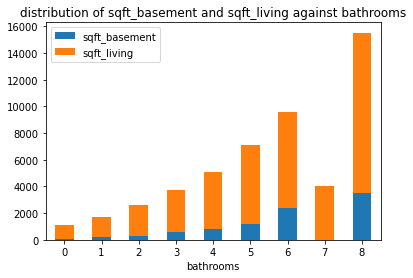

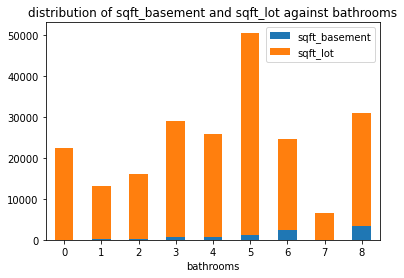

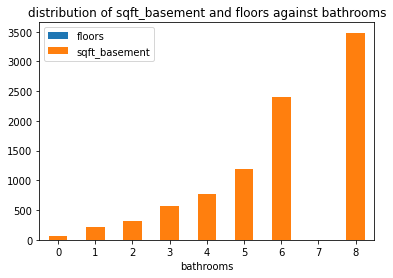

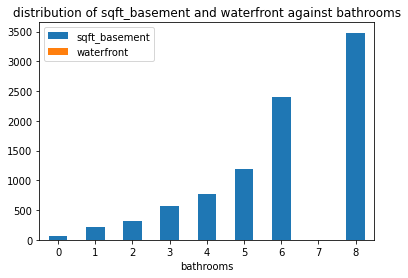

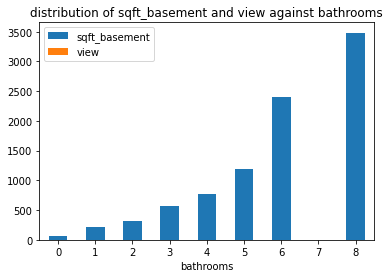

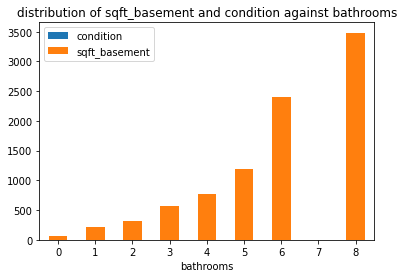

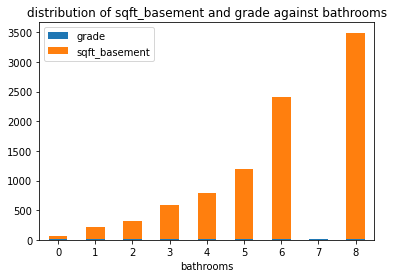

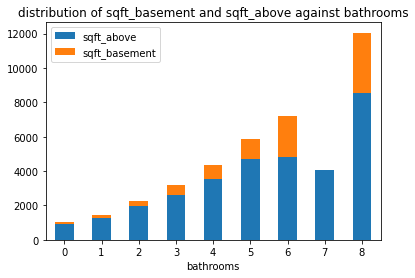

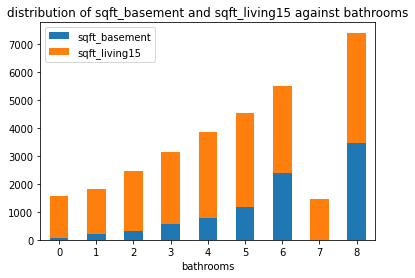

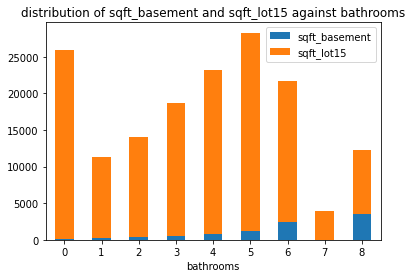

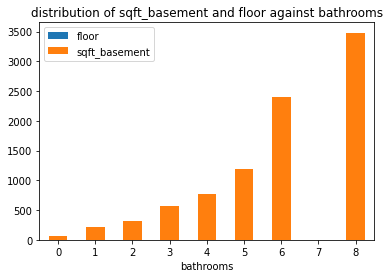

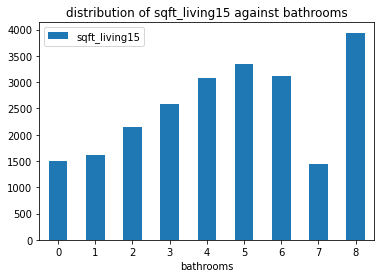

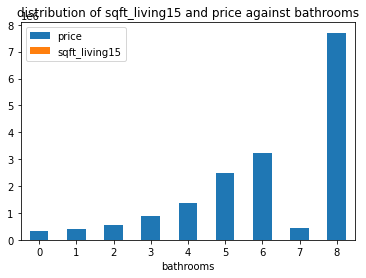

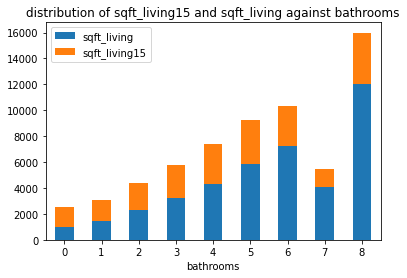

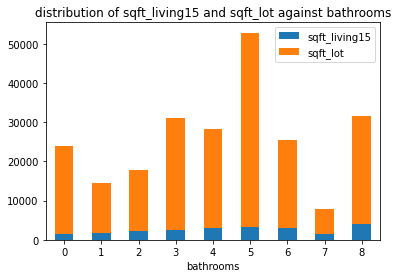

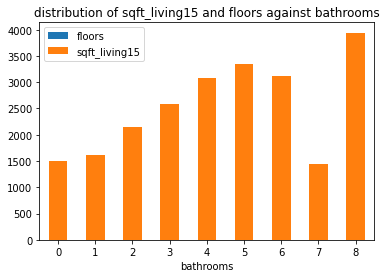

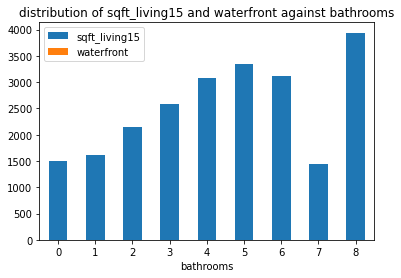

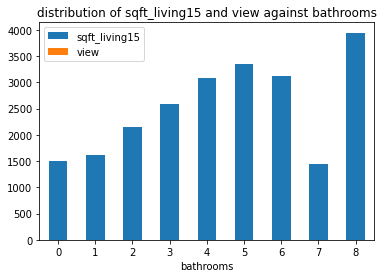

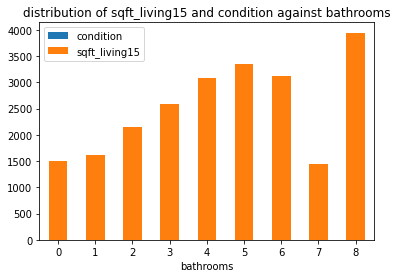

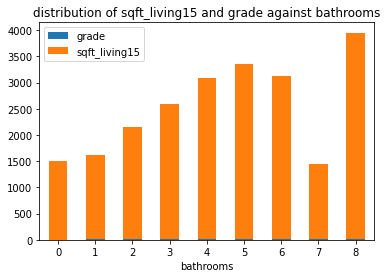

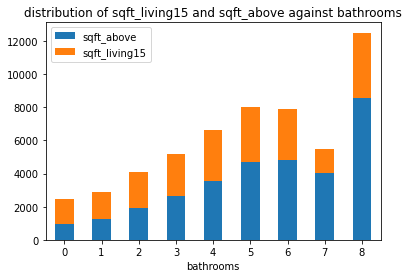

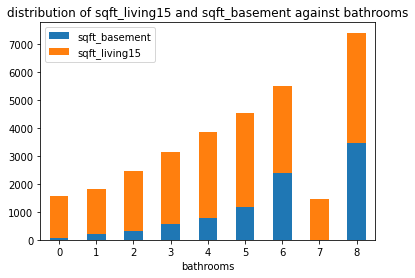

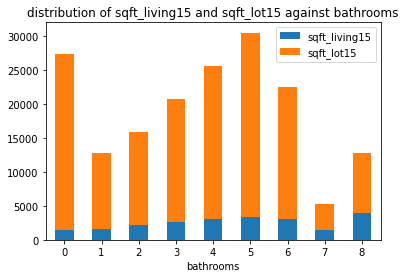

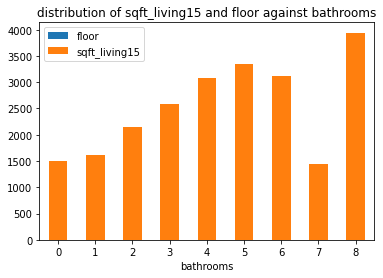

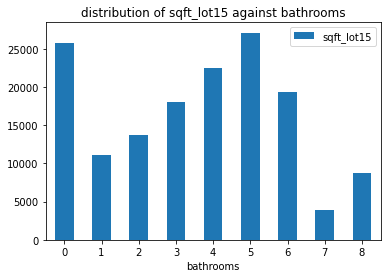

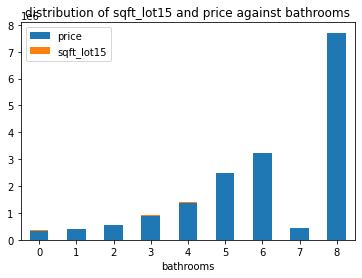

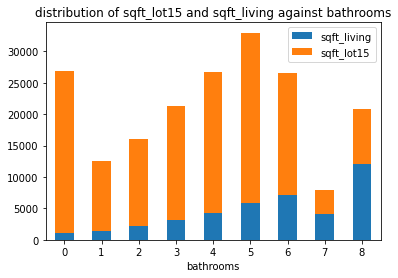

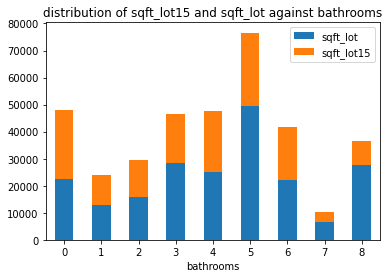

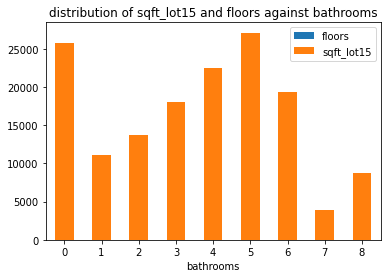

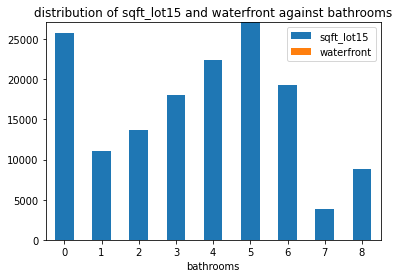

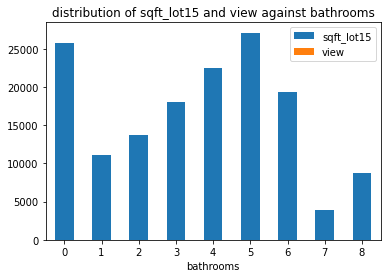

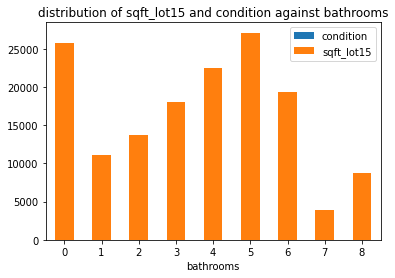

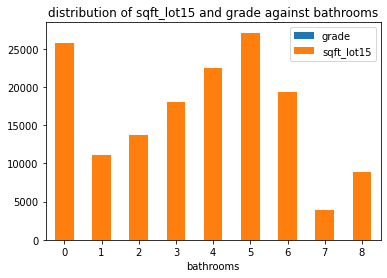

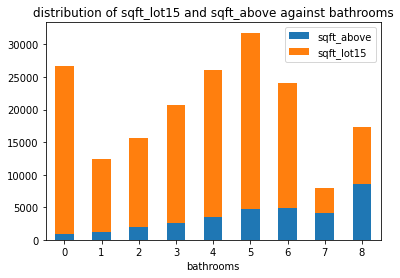

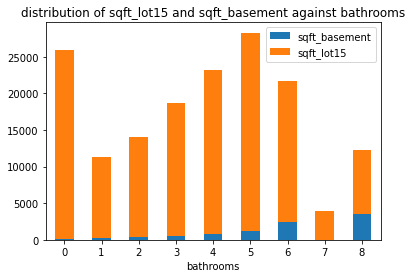

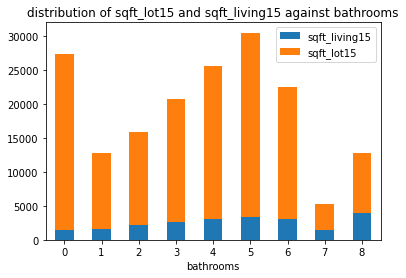

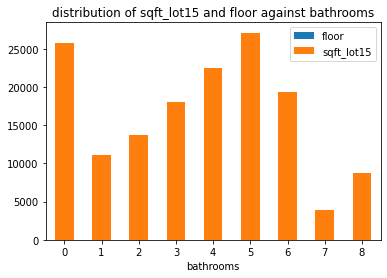

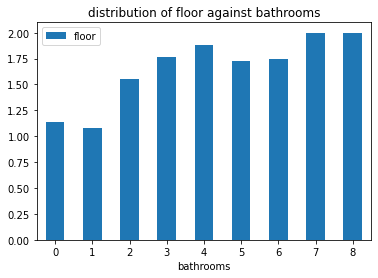

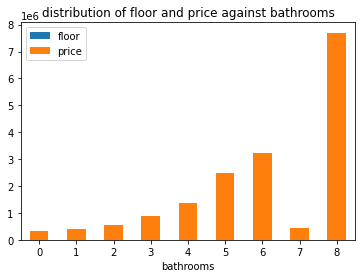

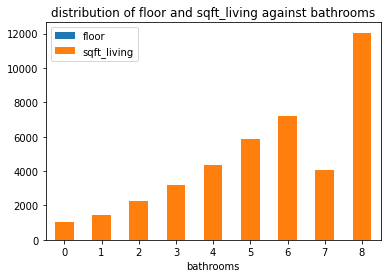

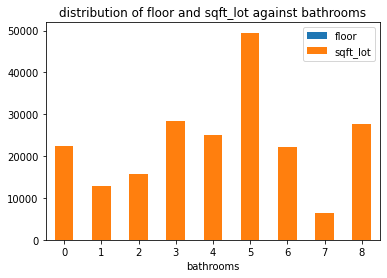

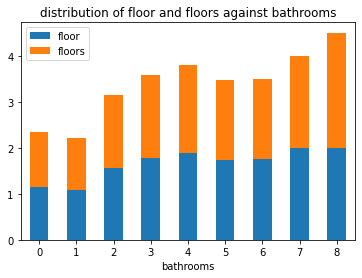

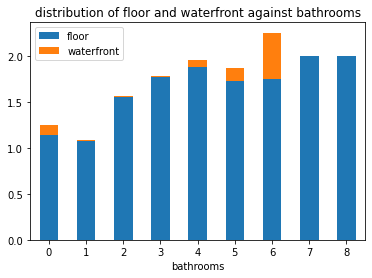

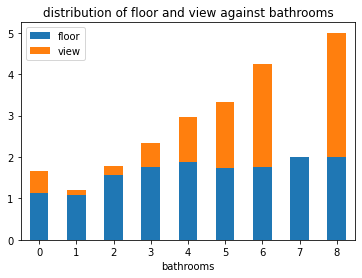

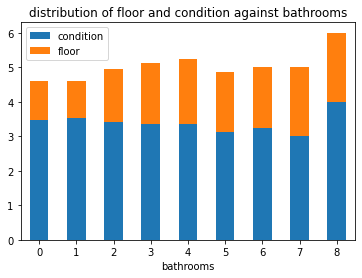

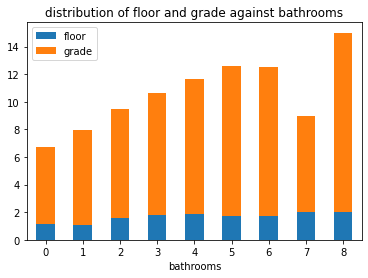

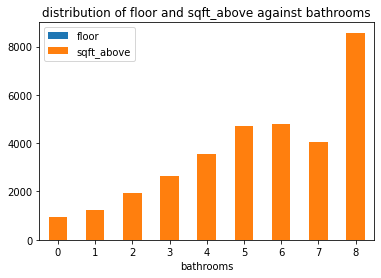

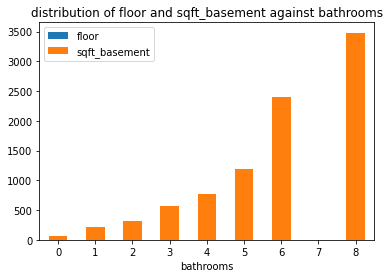

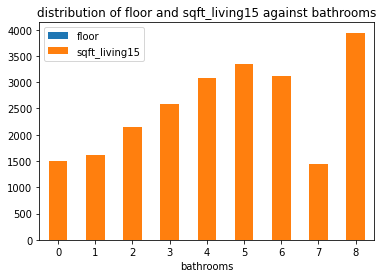

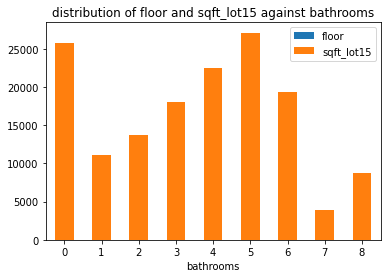

In [93]:
for grp in groupers:
  for othr in other:
    grpr=[]
    othrr=[]
    xtra=other.copy()
    xtra.remove(othr)
    grpr.append(grp)
    othrr.append(othr)
    plots(grpr,othrr)
    for xtr in xtra:
      othrr=[]
      othrr.append(othr)
      othrr.append(xtr)
      plots(grpr,othrr)

In [ ]:
print(grp)
xtra.remove(grp.)

In [86]:
xtra=other.copy()
xtra.remove(othr)
xtra

['price',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

# Hypotesis testing